# Fake News Classifier 

### Produced by: Aly Boolani

# Table of contents

1. [Data Collection](#DataCollection)
2. [Imports](#Imports)
3. [Data Exploration](#DataExploration)
4. [Preprocessing](#Preprocessing)
5. [Modelling](#Baselinemodels)
6. [GridSearchCV](#GridsearchCV) - Notebook 2

# Data Collection

***Data source:***
The data has been collected from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset and you can download it [here.](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

***Citations:***

1. Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

2. Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

This dataset contains two types of articles fake and real news. This dataset has been collected from real world sources; the truthful articles were obtained by crawling articles from Reuters.com (A legitimate News website). As for the fake news articles, they were collected from a number of various sources. These fake news artiicles were collected from unrreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contatins different types of articles on different topics, however, the majority of articles focus on political and world news topics. 

The dataset consists of two CSV files. The file ***True.csv*** contains more than 12,600 articles from reuter.com while the second file ***Fake.csv*** contains more than 12,600 articles from different fake news outlet resources. Each article (data point) contains the following information: 
- Article Title
- Article Text
- Article Subject
- Date the article was published on

The overall data has been cleaned for us prior to downloading on it and contains articles from 2016 to 2017 and contains punctuations and mistakes that existed in the ***Fake.csv*** were kept as is.


| News      | Size   |      Subject     | Article Count |
|-----------|--------|:----------------:|---------------------------|
| Real-News | 21,417 | World News       | 10,145                    |
|           |        | Political News   | 11,272                    |
|           |        |                  |                           |
| Fake-News | 23,481 | Government News  | 1,570                     |
|           |        | Middle-east News | 778                       |
|           |        | US News          | 783                       |
|           |        | Left-News        | 4459                      |
|           |        | Politics         | 6841                      |
|           |        | News             | 9050                      |
|           |        |                  |                           |

**Note:** 

From the original data, only a 30% sample of it will be used as the article length is extremely long and doing Natural Language Processing on it can be super computationally heavy. 

# Imports

In [1]:
# This is the first cell with all imports for throughout 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For saving the models later. 
import joblib

# Importing wordcloud and its necessary stopwords package
from wordcloud import WordCloud, STOPWORDS 

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# For seeing and removing stopwords
from nltk.corpus import stopwords 

# For lemmatizing our words 
from nltk.stem import WordNetLemmatizer

# For stemming our words 
from nltk.stem import PorterStemmer

# Cleaning tools imports 
# Importing string for cleaning punctuations
import string 

# Importing Regex
import re

# Vectorizing Imports
# Importing CountVectorizer to tokenize our articles
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# For making training and testing splits prior to modelling
from sklearn.model_selection import train_test_split

# Importing Scaler for Scaling Data
from sklearn.preprocessing import StandardScaler

# Importing the different models for modelling purposes
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# Importing metrics to evaluate our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# For building up a pipeline
from sklearn.pipeline import Pipeline

# For a cross-validated grid search
from sklearn.model_selection import GridSearchCV

Now that we've covered our imports, let's move on to importing the data into the notebook

# Data Exploration

#### Importing Data and making a copy of our dataframes so we don't alter the original dataframe

In [2]:
# Importing our True Articles 
# For personal machine
#tdf = pd.read_csv('News/True.csv')

# For Sage Maker or both
tdf = pd.read_csv('s3://aboolani-bucket-1/True.csv')
tdf.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Importing our Fake Articles 
# For personal machine
#fdf = pd.read_csv('News/Fake.csv')

# For Sage Maker or both
fdf = pd.read_csv('s3://aboolani-bucket-1/Fake.csv')
fdf.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**As mentioned earlier, below we will take a 30% sample of our original data due to the length of the articles**

In [4]:
# Let's make copies of our DataFrames as we don't want to make changes to the original one
true_df = tdf.sample(frac = .30).copy() # copying our true article dataframe
fake_df = fdf.sample(frac = .30).copy() # copying our fake articles dataframe

***Let's now look at doing some Exploratory Data Analysis***

In [5]:
# This option must only be altered if you want to see the entire text in the dataframe columns
# pd.set_option('display.max_colwidth, -1')

In [6]:
# looking at the first 10 rows of the true_df 
true_df.head(10)

,title,text,subject,date
17341,Spanish prosecutor asks for Catalan police chi...,MADRID (Reuters) - Spain s state prosecutor ha...,worldnews,"October 16, 2017"
14580,Germany to spend 10 million euros to help clea...,BERLIN (Reuters) - Germany will spend an initi...,worldnews,"November 17, 2017"
18880,NATO chief says Europe has interest in helping...,KABUL (Reuters) - NATO countries have strong r...,worldnews,"September 27, 2017"
20037,"Myanmar faces 'defining moment', must stop the...",LONDON (Reuters) - Myanmar is facing a defini...,worldnews,"September 14, 2017"
12283,Iran says weaponry displayed by Haley is 'fabr...,UNITED NATIONS (Reuters) - Iran rejected as un...,worldnews,"December 14, 2017"
12413,Rights group criticizes China for mass DNA col...,BEIJING (Reuters) - Chinese authorities have c...,worldnews,"December 13, 2017"
7239,"Janus' Gross says Trump will be one-termer, in...",NEW YORK (Reuters) - President-elect Donald Tr...,politicsNews,"November 16, 2016"
19772,Malawi ministers to testify against cabinet co...,LILONGWE (Reuters) - Three Malawian ministers ...,worldnews,"September 18, 2017"
1810,Trump calls for a tax reform 'speed-up' in lig...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 10, 2017"
13628,"Trump, Japan's Abe agree to boost deterrence a...",TOKYO (Reuters) - U.S. President Donald Trump ...,worldnews,"November 28, 2017"


In [7]:
# looking at the last 10 rows of the true_df 
true_df.tail(10)

,title,text,subject,date
10486,"German minister calls Trump a threat, Merkel l...",BERLIN (Reuters) - German Economy Minister Sig...,politicsNews,"March 6, 2016"
12701,Palestinian negotiator says 'no talking' with ...,CAIRO (Reuters) - Palestinian chief negotiator...,worldnews,"December 8, 2017"
3693,Trump budget to give first look at infrastruct...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"May 19, 2017"
11351,Syria says military jet downed in northern Ham...,AMMAN (Reuters) - Syria s armed forces said in...,worldnews,"December 26, 2017"
10505,Republican Kasich: Presidential contests will ...,WASHINGTON (Reuters) - Republican candidate Jo...,politicsNews,"March 4, 2016"
3341,Senators criticize Trump's information shut-ou...,WASHINGTON (Reuters) - U.S. senators from both...,politicsNews,"June 7, 2017"
7345,Judge tells Trump University litigants they wo...,SAN DIEGO (Reuters) - The U.S. judge overseein...,politicsNews,"November 10, 2016"
5408,"Senior House Democrats want briefing on Flynn,...",WASHINGTON (Reuters) - The House of Representa...,politicsNews,"February 16, 2017"
10169,"Factbox: Increase defense spending, lower indi...",(Reuters) - Presidential candidate John Kasich...,politicsNews,"March 25, 2016"
16786,"Putin critic Navalny, freed from jail, resumes...",MOSCOW (Reuters) - Russian opposition leader A...,worldnews,"October 22, 2017"


In [8]:
# looking at the first 10 rows of the fake_df 
fake_df.head(10)

,title,text,subject,date
8306,Super Bowl QB Peyton Manning Bankrolling This...,When you sit down to watch the Super Bowl cont...,News,"February 6, 2016"
1806,Republican Compares Lincoln To Hitler; This T...,Whitewashing Hitler and the Holocaust seems to...,News,"April 12, 2017"
3291,The Rockettes Are Hitting Back At Being Force...,With no one wanting to perform for Donald Trum...,News,"December 23, 2016"
6419,George Zimmerman Is Selling The Gun He Used T...,"***UPDATE***The listing has been removed, and ...",News,"May 12, 2016"
16675,VIGILANTE PIRATES INTERCEDE Where Government F...,Like the Soldiers of Oden vigilante group we r...,Government News,"Apr 1, 2016"
15383,BIRDS OF A FEATHER: FAMOUS CELEBRITY ADULTERER...,"Sorry Tiger, Hillary has a lot of influence bu...",politics,"Jul 31, 2015"
22979,Boiler Room #99 – Almost to 100!,Tune in to the Alternate Current Radio Network...,Middle-east,"March 2, 2017"
11859,"Conservative Author DESTROYS Hypocrisy, Mispla...",Hundreds of protestors and LGBTQ activists too...,politics,"Jan 19, 2017"
14185,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,politics,"Mar 31, 2016"
7796,Iran Stuns World In First Election Since Nucl...,Republicans may have done everything they coul...,News,"February 28, 2016"


In [9]:
# Looking at the last 10 rows of the fake_df 
fake_df.tail(10)

,title,text,subject,date
14180,HILLARY PANDERS FOR BLACK VOTE: Busts Out In A...,So now it s funny that Bill Clinton had oral s...,politics,"Apr 2, 2016"
6046,Trump Responds To Devastating Clinton Attack ...,After former Secretary of State Hillary Clinto...,News,"June 3, 2016"
19881,HOW THE CLINTON FOUNDATION RIPPED OFF HAITI…St...,While the media salivates over the illegal rel...,left-news,"Oct 2, 2016"
21549,[VIDEO] LEFTIST CNN HOST ACTUALLY SAID THIS: C...,When she s not shamelessly bashing people who ...,left-news,"Jul 18, 2015"
17250,EPA CHIEF: ‘CLIMATE DENIERS’ AREN’T NORMAL PEOPLE,What s with the cultish attitude coming from o...,Government News,"Jun 24, 2015"
7155,Michigan’s Republican Governor Just Won A Maj...,Fortune released their The World s 19 Most Di...,News,"April 1, 2016"
10897,POST-OBAMA AMERICA: Liberal Thug Gets Physical...,It s becoming fairly commonplace for public ac...,politics,"May 12, 2017"
22478,Not a Journalist: CNN’s Brian Stelter Manages ...,21st Century Wire says CNN s Brian Stelter hos...,US_News,"September 16, 2016"
18587,WOW! IS SEAN HANNITY’S Job With FOX News In Je...,"What the heck is going on over at FOX News, th...",left-news,"May 23, 2017"
11187,BREAKING: Trump Reportedly Considering Replaci...,Everyone knows not to talk to her in the Whit...,politics,"Apr 7, 2017"


In [10]:
# We're going to reset index here because it'll remove any discrepencies 
true_df.reset_index(drop = True, inplace = True)
fake_df.reset_index(drop = True, inplace = True)

We're going to change the way our titles and texts are written. This involves removing punctuation from our articles, removing numbers as well as lowering the case.

In [11]:
# Removing punctuations, numbers and lower casing from our title columns of both dataframes
# Step 1 - Removing all punctuations from our 'title' columns
# Source: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
true_df['title'] = true_df['title'].str.translate(str.maketrans('', '', string.punctuation))
fake_df['title'] = fake_df['title'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers from our 'title' columns
# Source: https://stackoverflow.com/questions/12851791/removing-numbers-from-string/12856384#12856384
true_df['title'] = true_df['title'].str.translate(str.maketrans('', '', string.digits))
fake_df['title'] = fake_df['title'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase for the column 'title' in both dataframes
true_df['title'] = true_df['title'].str.lower()
fake_df['title'] = fake_df['title'].str.lower()


In [12]:
# Removing punctuations, numbers and lower casing from our text columns of both dataframes
# Step 1 - Removing all punctuations from our 'text' columns
# Source: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
true_df['text'] = true_df['text'].str.translate(str.maketrans('', '', string.punctuation))
fake_df['text'] = fake_df['text'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers from our 'text' columns
# Source: https://stackoverflow.com/questions/12851791/removing-numbers-from-string/12856384#12856384
true_df['text'] = true_df['text'].str.translate(str.maketrans('', '', string.digits))
fake_df['text'] = fake_df['text'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase for the column 'text' in both dataframes
true_df['text'] = true_df['text'].str.lower()
fake_df['text'] = fake_df['text'].str.lower()


In [13]:
# Inspecting if the changes above were made
true_df.head()

,title,text,subject,date
0,spanish prosecutor asks for catalan police chi...,madrid reuters spain s state prosecutor has a...,worldnews,"October 16, 2017"
1,germany to spend million euros to help clear ...,berlin reuters germany will spend an initial ...,worldnews,"November 17, 2017"
2,nato chief says europe has interest in helping...,kabul reuters nato countries have strong reas...,worldnews,"September 27, 2017"
3,myanmar faces defining moment must stop the vi...,london reuters myanmar is facing a defining ...,worldnews,"September 14, 2017"
4,iran says weaponry displayed by haley is fabri...,united nations reuters iran rejected as unfou...,worldnews,"December 14, 2017"


In [14]:
# Inspecting if the changes above were made
fake_df.head()

,title,text,subject,date
0,super bowl qb peyton manning bankrolling this...,when you sit down to watch the super bowl cont...,News,"February 6, 2016"
1,republican compares lincoln to hitler this ti...,whitewashing hitler and the holocaust seems to...,News,"April 12, 2017"
2,the rockettes are hitting back at being force...,with no one wanting to perform for donald trum...,News,"December 23, 2016"
3,george zimmerman is selling the gun he used t...,updatethe listing has been removed and zimmerm...,News,"May 12, 2016"
4,vigilante pirates intercede where government f...,like the soldiers of oden vigilante group we r...,Government News,"Apr 1, 2016"


We can see the changes have been made. Let's now take a look at the number of words in our title and article texts for both the real and fake articles. This will help in understanding what the word count for different articles might be and how representative that might be: 

In [15]:
# Getting the total number of words in our title column for the true articles 
true_df['Title Word Count'] = true_df['title'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our text column for the true articles 
true_df['Text Word Count'] = true_df['text'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our title column for the fake articles 
fake_df['Title Word Count'] = fake_df['title'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our text column for the fake articles 
fake_df['Text Word Count'] = fake_df['text'].apply(lambda x: len(x.split(' ')))

In [16]:
# Print statements for number of words in article titles and text
# For printing Max Min Mean for title lengths
print('********Title Column********')
print(f"Maximum wordcount of real article titles: {true_df['Title Word Count'].max()}")
print(f"Maximum wordcount of fake articles titles: {fake_df['Title Word Count'].max()}")  
print()
print(f"Minimum wordcount of real article titles: {true_df['Title Word Count'].min()}")
print(f"Minimum wordcount of fake articles titles: {fake_df['Title Word Count'].min()}")  
print()
print(f"Average wordcount of real article titles: {true_df['Title Word Count'].mean()}")
print(f"Average wordcount of fake articles titles: {fake_df['Title Word Count'].mean()}")  
print()
print()
      
# For printing Max Min Mean for text lengths
print('********Text Column********')
print(f"Maximum wordcount of real articles text: {true_df['Text Word Count'].max()}")
print(f"Maximum wordcount of fake articles text: {fake_df['Text Word Count'].max()}")  
print()
print(f"Minimum wordcount of true articles text: {true_df['Text Word Count'].min()}")
print(f"Minimum wordcount of fake articles text: {fake_df['Text Word Count'].min()}")  
print()
print(f"Average wordcount of fake real article text: {true_df['Text Word Count'].mean()}")
print(f"Average wordcount of fake fake articles text: {fake_df['Text Word Count'].mean()}")
      


********Title Column********
Maximum wordcount of real article titles: 20
Maximum wordcount of fake articles titles: 45

Minimum wordcount of real article titles: 4
Minimum wordcount of fake articles titles: 1

Average wordcount of real article titles: 9.983813229571984
Average wordcount of fake articles titles: 15.06572969903464


********Text Column********
Maximum wordcount of real articles text: 3696
Maximum wordcount of fake articles text: 8109

Minimum wordcount of true articles text: 2
Minimum wordcount of fake articles text: 1

Average wordcount of fake real article text: 394.31377431906617
Average wordcount of fake fake articles text: 436.3486655309483


**Let's plot the distribution for these individually:**

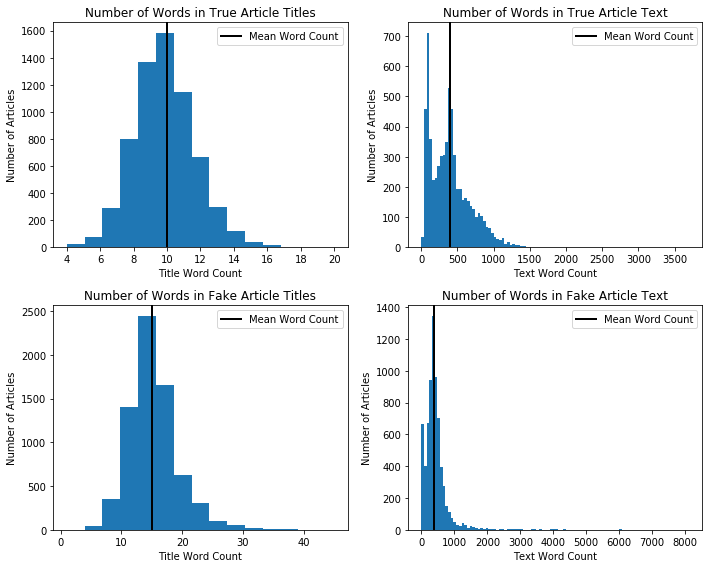

In [17]:
# Setting up our subplots
plt.subplots(2,2, figsize = (10,8))

# Subplot 1: Title word counts for true dataframe
plt.subplot(2,2,1)
plt.hist(true_df['Title Word Count'], bins =15)
plt.title('Number of Words in True Article Titles')
plt.xlabel('Title Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 2: Text word counts for true dataframe
plt.subplot(2,2,2)
plt.hist(true_df['Text Word Count'], bins =100)
plt.title('Number of Words in True Article Text')
plt.xlabel('Text Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 3: Title word counts for fake dataframe
plt.subplot(2,2,3)
plt.hist(fake_df['Title Word Count'], bins =15)
plt.title('Number of Words in Fake Article Titles')
plt.xlabel('Title Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=fake_df['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 4: Text word counts for fake dataframe
plt.subplot(2,2,4)
plt.hist(fake_df['Text Word Count'], bins = 100)
plt.title('Number of Words in Fake Article Text')
plt.xlabel('Text Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()
plt.tight_layout()
plt.show()


Some observations that can be made here are:

- An article that is factual tends to have about 10 words, on average, in their titles while fake articles or articles that have misinformation tend to have about 15 words on average. 
- In terms of the article text length, both articles tend to have an average length of 396 words for the factual content and 436 words for the article with misinformation respectively. 
- One thing to note here is that the maximum length of our factual articles is 3000 words while the articles which can be classified as fake or having misinformation have articles a length of up to approximately 8500 words. We must keep in mind that this is only 30% of the entire data. 
- We also see that the number of articles for the true and fake articles vary on the y axis and seems like there's a lot more titles than text. There seems to be almost twice the number of titles than text. 


A decision has to be made here and it is to drop all articles over the length of 3000 words. This is because we don't want our model to predict whether an article is factual or not based on the length of the article **rather** than the way it's written. 

In [18]:
# Printing out some information for the reader to scroll through & understand what proportion of the data is being dropped
# Counting the number of data points 
print('The number of articles that have a word count of more than 3000 words in our text column:')
print(len(true_df[true_df['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('The propotion of the true articles that will be dropped:')
print(len(true_df[true_df['Text Word Count'] > 3000]) / len(true_df))
print()

# Checking for all rows where Text Word Count is over 3000 
print("The rows that'll be dropped are as follows:")
print()
display(true_df[true_df['Text Word Count'] > 3000])

The number of articles that have a word count of more than 3000 words in our text column:
1

The propotion of the true articles that will be dropped:
0.0001556420233463035

The rows that'll be dropped are as follows:



,title,text,subject,date,Title Word Count,Text Word Count
6367,trump soninlaw kushners congressional statement,washington reuters i am voluntarily providing...,politicsNews,"July 24, 2017",5,3696


For our `true_df`, it seems like only 6 articles have a word count of over 3000 for our real articles, which is less than 0.0002% of our total text so we will drop these.

In [19]:
# Printing out some information for the reader to scroll through & understand what proportion of the data is being dropped
# Counting the number of data points
print('The number of articles that have a word count of more than 3000 words in our text column:')
print(len(fake_df[fake_df['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('The propotion of the fake articles that will be dropped:')
print(len(fake_df[fake_df['Text Word Count'] > 3000]) / len(fake_df))
print()

# Checking for all rows where Text Word Count is over 3000 
print("The rows that'll be dropped are as follows:")
print()
display(fake_df[fake_df['Text Word Count'] > 3000])


The number of articles that have a word count of more than 3000 words in our text column:
33

The propotion of the fake articles that will be dropped:
0.004684838160136286

The rows that'll be dropped are as follows:



,title,text,subject,date,Title Word Count,Text Word Count
153,washington post sloppy ‘journalism’ blames rus...,patrick henningsen st century wire the mainstr...,US_News,"November 26, 2016",16,6028
493,here you go every bat sht crazy thing that ca...,donald trump spent monday night making a total...,News,"September 27, 2016",19,4051
836,fake news the unravelling of us empire from wi...,setting the stage of the presspresident warus ...,Middle-east,"March 28, 2017",9,3569
1413,sunnistan us and allied ‘safe zone’ plan to ta...,patrick henningsen st century wireremember wh...,US_News,"January 15, 2016",14,4343
1623,big fat lie being told by lefty media about tr...,i just happened to be listening to rush today ...,politics,"Nov 20, 2015",17,3074
1710,“prophecy” propaganda zionist millennialism re...,jay dyer st century wiredemonstrating where b...,Middle-east,"October 18, 2016",5,3984
1768,orlando ‘known wolf’ watched by fbi worked wit...,shawn helton st century wireorlando s pulse ...,US_News,"June 16, 2016",15,5250
1877,wow america is under attack by these organiza...,there have been many articles written about ge...,left-news,"Nov 13, 2016",14,6864
2035,‘one for the ages’ full video and transcript o...,a speech for the ages was given today by presi...,Government News,"Sep 19, 2017",14,4576
2063,antiamerican george soros locks arms with nfl ...,we just discovered another reason not to suppo...,left-news,"Oct 7, 2017",9,7305


From the above, we can see the data points we want to drop. A data point can also be considered an article. We will therefore be dropping all data points over 3000 words. The proportions of these articles being dropped is less that 0.05% and that's the threshold we would be okay with when considering to drop the data. Now that our outlier articles are being removed, let's drop these rows above and reset our indexes. While we're doing this, we also plan to drop any article that has a length of less than 20 words as most articles don't tend to be under that word limit. 

In [20]:
# Now that the articles have been dropped, it's time to reset the index once again. 
# Dropping rows from true articles dataframe where text length is under 20 and over 4000 words and resetting index 
true_df.drop(true_df[true_df['Text Word Count'] < 20].index, inplace = True)
true_df.drop(true_df[true_df['Text Word Count'] > 3000].index, inplace = True)
true_df.reset_index(drop = True, inplace = True)

# Dropping rows from fake articles dataframe where text length is under 20 and over 4000 words and resetting index 
fake_df.drop(fake_df[fake_df['Text Word Count'] < 20].index, inplace = True)
fake_df.drop(fake_df[fake_df['Text Word Count'] > 3000].index, inplace = True)
fake_df.reset_index(drop = True, inplace = True)

**Let's plot the distribution for these together to better compare:**

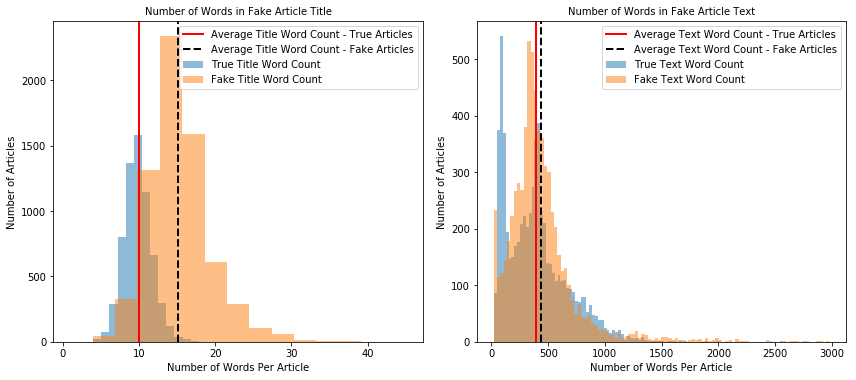

In [21]:
plt.subplots(1,2, figsize = (12,10))

# Subplot 1 - Showing the true and fake title word length 
plt.subplot(2,2,1)
plt.hist(true_df['Title Word Count'], bins =15, label = 'True Title Word Count', alpha = 0.5)
plt.hist(fake_df['Title Word Count'], bins =15, label = 'Fake Title Word Count', alpha = 0.5)
plt.title('Number of Words in Fake Article Title', fontsize = 10)
plt.xlabel('Number of Words Per Article', fontsize = 10)
plt.ylabel('Number of Articles', fontsize = 10)
plt.legend()
plt.axvline(x=true_df['Title Word Count'].mean(),
            linewidth = 2, linestyle = '-', color = 'red',
            label = 'Average Title Word Count - True Articles')
plt.axvline(x=fake_df['Title Word Count'].mean(),
            linewidth = 2, linestyle = '--', color = 'black',
            label = 'Average Title Word Count - Fake Articles')
plt.legend()


# Subplot 2 - Showing the true and fake text word length
plt.subplot(2,2,2)
plt.hist(true_df['Text Word Count'], bins =100, label = 'True Text Word Count', alpha = 0.5, log = True)
plt.hist(fake_df['Text Word Count'], bins =100, label = 'Fake Text Word Count', alpha = 0.5, log = True)
plt.title('Number of Words in Fake Article Text', fontsize = 10)
plt.xlabel('Number of Words Per Article', fontsize = 10)
plt.ylabel('Number of Articles', fontsize = 10)
plt.yscale('linear')
plt.axvline(x=true_df['Text Word Count'].mean(),
            linewidth = 2, linestyle = '-', color = 'red',
            label = 'Average Text Word Count - True Articles')
plt.axvline(x=fake_df['Text Word Count'].mean(),
            linewidth = 2, linestyle = '--', color = 'black',
            label = 'Average Text Word Count - Fake Articles')
plt.legend()

plt.tight_layout()
plt.show()

From the above visuals, we can make the following observations:

- The data points over 3000 words in their articles have now been dropped.
- The above histograms shows the distribution of both our titles and text for articles word counts and it would be fair to say that fake articles tend to have a longer title than factual or real articles while having a similar average of for their texts.

**Let's now try and look at some of the other information for our dataframes**

In [22]:
# Checking our True article columns
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 6 columns):
title               6423 non-null object
text                6423 non-null object
subject             6423 non-null object
date                6423 non-null object
Title Word Count    6423 non-null int64
Text Word Count     6423 non-null int64
dtypes: int64(2), object(4)
memory usage: 301.2+ KB


In [23]:
# Checking our Fake article columns
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6705 entries, 0 to 6704
Data columns (total 6 columns):
title               6705 non-null object
text                6705 non-null object
subject             6705 non-null object
date                6705 non-null object
Title Word Count    6705 non-null int64
Text Word Count     6705 non-null int64
dtypes: int64(2), object(4)
memory usage: 314.4+ KB


In [24]:
# Checking our datatypes for the True CSV
true_df.dtypes

title               object
text                object
subject             object
date                object
Title Word Count     int64
Text Word Count      int64
dtype: object

In [25]:
# Checking our datatypes for the Fake CSV
fake_df.dtypes

title               object
text                object
subject             object
date                object
Title Word Count     int64
Text Word Count      int64
dtype: object

From the above code, we can see the data types of the columns. The title, text, subject and date column have been read in as strings while the two columns that we created with the word counts have the type as integer. As for now, we're going to let these be and **not** manipulate the data types for all columns yet. 

##### Time to see whether our columns have duplicated or null values

In [26]:
# Checking for the sum of duplicated datapoints in our True DataFrame
true_df.duplicated().sum()

21

In [27]:
# Checking for the sum of duplicated datapoints in our Fake DataFrame
fake_df.duplicated().sum()

0

There seems to be a few duplicated articles in our `true_df` so we will drop these too moving forward. Let's also look at the null values so we can drop that as well. 

In [28]:
# Checking for nulls in our True DataFrame
true_df.isna().sum()

title               0
text                0
subject             0
date                0
Title Word Count    0
Text Word Count     0
dtype: int64

In [29]:
# Checking for nulls in our Fake DataFrame
fake_df.isna().sum()

title               0
text                0
subject             0
date                0
Title Word Count    0
Text Word Count     0
dtype: int64

In [30]:
# Identifying unique True Articles through the title - also a sanity check for the number stated earlier
true_df['title'].value_counts().sum()

6423

In [31]:
# Identifying unique True Articles through the title - also a sanity check for the number stated earlier
fake_df['title'].value_counts().sum()

6705

In [32]:
# Describing our True data
true_df.describe()

,Title Word Count,Text Word Count
count,6423.000000,6423.000000
mean,9.985521,393.860813
std,1.725279,273.321433
min,4.000000,24.000000
25%,9.000000,158.000000
50%,10.000000,369.000000
75%,11.000000,535.000000
max,20.000000,2564.000000


In [33]:
# Describing our Fake data
fake_df.describe()

,Title Word Count,Text Word Count
count,6705.000000,6705.000000
mean,15.112155,435.983743
std,4.159873,306.173014
min,1.000000,20.000000
25%,12.000000,269.000000
50%,15.000000,381.000000
75%,17.000000,521.000000
max,45.000000,2977.000000


**To get a sense of what words might be included in our titles, let's pull out a word cloud**. This has **only** been done for the title column and not the text column due to it being computationally heavy. Hence, the words that we see in the title columns will be put into a list of stopwords when vectorizing assuming that the text columns are represented by the titles and will have repeated words. 

In [34]:
# Creating wordclouds to see words in true_df_text
# Setting up or stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
listofwords_true_df_title = ''

# Iterating over every word in our column
for word in true_df['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   listofwords_true_df_title += " ".join(word)+" "
                
# Source : https://www.geeksforgeeks.org/generating-word-cloud-python/

# Intializing a Word Cloud 
wordcloud_true_df_title = WordCloud(width = 500,\
                                   height = 500,\
                                   background_color = 'white',\
                                   stopwords = stopwords).generate(listofwords_true_df_title)

In [35]:
# Creating wordclouds to see words in fake_df_title
# Setting up stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
listofwords_fake_df_title = ''

# Iterating over every word in our column
for word in fake_df['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   listofwords_fake_df_title += " ".join(word)+" "
                
# Source : https://www.geeksforgeeks.org/generating-word-cloud-python/

# Intializing a Word Cloud 
wordcloud_fake_df_title = WordCloud(width = 500,\
                                   height = 500,\
                                   background_color = 'white',\
                                   stopwords = stopwords).generate(listofwords_fake_df_title)

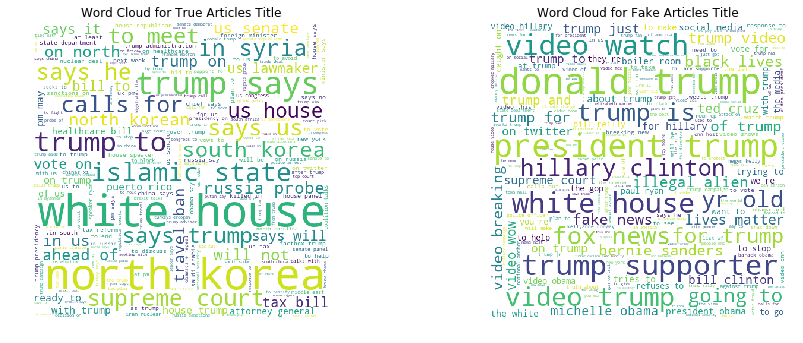

In [36]:
# Now that we've intialized the word clouds. let's build up the word cloud. 
# Plotting 2 subplots to identify different words within the title columns for both dataframes
plt.subplots(1,2, figsize = (15,12))

# Wordcloud for True Dataframe title 
plt.subplot(2,2,1)
plt.imshow(wordcloud_true_df_title)
plt.title('Word Cloud for True Articles Title')
plt.axis('off')

# Wordcloud for Fake Dataframe title
plt.subplot(2,2,2)
plt.imshow(wordcloud_fake_df_title)
plt.title('Word Cloud for Fake Articles Title')
plt.axis('off')

# Showing the plot 
plt.show()

We can now see the different words that show up. However, we can right away notice that many of our articles tend to be political as mentioned earlier and have certain words that may bias the models prediction when predicting whether or not the article is true or fake. Hence, we will create a list of stopwords with these specific words and others that come along the exploratory data analysis. Let's summarize all the observations we can make from our Exploratory Data Analysis above prior to jumping into preprocessing the data for modelling. 

---
### Basic Observations
---

Some of the observations made reviewing the text in the different columns for the two dataframes above:
- `True Articles or true_df`
    - Many words seem to be repeated which will be added to the list of stopwords in order to reduce the models predictibility based on these words.
    - The articles in our data set are published by international news organizations. 
    - Some of the other things we saw while inspecting the data is that the information, when being read by pandas, didn't seem to be read right so we need to inspect a few data points. 
    - The way these articles are written, it seems to have a more natural and a neutral sentiment (considering these our mostly political articles) and tends to state facts rather than accusations while providing some sort of contextual support to back it up. 
    
    
- `Fake Articles or fake_df`
    - Many of the words here seem to be repeated as well which will be added to the list of stopwords as well. However, one thing to notice is that the title doesn't full depicct what the article states but rather is written  in  a manner to grab attention. 
    - When comparing it with the true articles, these fake articles resulted in having a lot more punctuation along with excessive capitalization and offensive words. Not only that, there was a lot more URLs or website links present in the text. 
    - We also noticed the different subjects in our data which might be something we will later consider. 


#### Some assumptions, observations and decisions made for all articles along with some next steps
- In our exploration earlier, we saw that there was a font or reading issue within the dataframe so we will also pull out some of the columns and rows to identify whether the entirety of the text is present or is content being missed out. Hence, it would be smart to take a deeper dive in this and identify the issues  
- The title column seems to be related to the text of the article. We could do a cosine similarity and check for this further but this was visually inspected while getting familiarized with the data. 
- We decided to remove punctuations, digits/numbers and lowered the sentence case for both texts in order to keep it more straightforward. Again, this was done so that our model doesn't pick up fake articles based on punctuations or things we removed but rather on the way it's written. 
- The duplicates were noted and will be removed from our data set for both articles and luckily there were no null values either so we're good to proceed. 
- The  length of the titles for fake articles tend to be longer than the length of the true article title.
- Both dataframes have similar columns and that will be the way it will be merged later on stacked on top of each other. 
- We will be making the dataframe a little cleaner by changing the subject names through using capitalization and spacing.
-  We also saw a bunch of different subjects within the fake_df column so we will combine them and create binary columns to match with the categories in the true_df column
- We will then be moving on to cleaning the data and preprocessing the text for modelling purposes. 
- Prior to tokenizing our text, we will create a tokenizer to ensure the text provided to the vectorizer is clean, free of punctuations, numbers, tags, html links, stop words and is in lowercase.


##### Checking to see if the content is copied correctly considering the font issue we faced earlier:

In [37]:
# As we saw earlier the text in the dataframe wasn't showing up correctly. 
# We've checked some of the text through pulling it out and it seems to be just fine 
# Not sure why the issue comes up in the dataframe
# Below are some examples which can be run in order to see the completeness of the text when called upon

In [38]:
# Checking for the fourth datapoint
true_df[['title','text']].loc[3]

title    myanmar faces defining moment must stop the vi...
text     london reuters  myanmar is facing a  defining ...
Name: 3, dtype: object

In [39]:
# Checking for the fifth datapoint
true_df[['title','text']].loc[4]

title    iran says weaponry displayed by haley is fabri...
text     united nations reuters  iran rejected as unfou...
Name: 4, dtype: object

In [40]:
# Checking for the sixth datapoint
true_df[['title','text']].loc[5]

title    rights group criticizes china for mass dna col...
text     beijing reuters  chinese authorities have coll...
Name: 5, dtype: object

In [41]:
# Checking for the twenty first datapoint
fake_df[['title','text']].loc[20]

title     breaking dakota access pipeline stopped by ar...
text     the army corps of engineers has denied an ease...
Name: 20, dtype: object

In [42]:
# Checking for the six hundredth and nineth datapoint
fake_df[['title','text']].loc[608]

title    benghazi spokesliar susan rice tells cnn ‘we s...
text     tell us susan what s worse iran with a nuclear...
Name: 608, dtype: object

In [43]:
# Checking for the fifty third datapoint
fake_df[['title','text']].loc[52]

title         explained the west’s ngo ‘human rights’ scam
text     just look around the world and throughout rece...
Name: 52, dtype: object

From the above, we can see that these data points were read in correctly. However, the issue might seem like because there's a lot of text in our data point, it seems to not read in properly. 

##### Removing duplicates

In [44]:
# Here, we're going to remove all duplicated rows for both True and Fake news CSVs
# As per our check previously, there were a few duplicated rows in the in the true dataframe while none in the fake
# However, we're going to run the following code on both data frames to remove these duplicated rows just in case. 
# Let's remove these now

# Removing duplicates from True DataFrame.
true_df.drop_duplicates(inplace = True)


# Removing duplicates from Fake DataFrame
fake_df.drop_duplicates(inplace = True)

In [45]:
# Doing a sanity check again for seeing if these values have been dropped in the True DataFrame
true_df.duplicated().sum()

0

In [46]:
# Doing a sanity check again for seeing if these values have been dropped in the Fake DataFrame
fake_df.duplicated().sum()

0

We've now gotten rid of all our duplicates and did a sanity check to see if this took place. Let's again reset the index so that we dont have missing indexes 

In [47]:
# Restting the index after removing duplicate
true_df.reset_index(drop = True, inplace = True)
fake_df.reset_index(drop = True, inplace = True)

##### Let's look at the articles subjects below and it's value counts:

In [48]:
# Checking for our subject
true_df['subject'].value_counts()

politicsNews    3324
worldnews       3078
Name: subject, dtype: int64

In [49]:
# Checking for our subject
fake_df['subject'].value_counts()

News               2709
politics           1817
left-news          1294
Government News     434
Middle-east         230
US_News             221
Name: subject, dtype: int64

##### Let's do some cleaning up for our subject columns and making it more legible

In [50]:
# Renaming the columns and grouping together to create a binary classification for true_df
cleaning_dict_true = {'politicsNews' : 'Political News' ,\
                        'worldnews' : 'World News'}

# Assigning the new title columns for true_df
true_df['subject'] = true_df['subject'].map(cleaning_dict_true)

In [51]:
# Renaming the columns and grouping together to create a binary classification for fake_df
cleaning_dict_fake = {'politics' : 'Political News',\
                        'Government News' : 'Government News',\
                        'News' : 'News',\
                        'left-news' : 'Left News',\
                        'US_News' : 'US News',\
                        'Middle-east' : 'Middle Eastern News'}

# Assigning the new title columns for fake_df
fake_df['subject'] = fake_df['subject'].map(cleaning_dict_fake)

##### Let's also plot these value counts to see how the distribution of the data is:

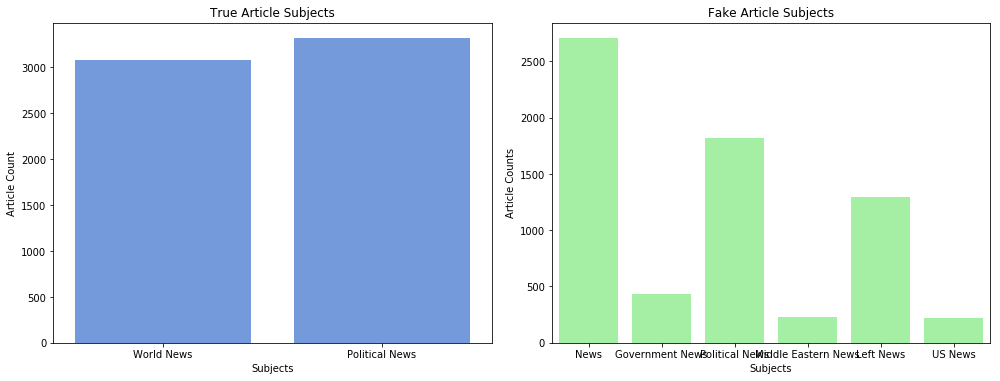

In [52]:
plt.subplots(1,2, figsize = (14,10))

# Making our first subplot
plt.subplot(2,2,1)
plt.title('True Article Subjects')
sns.countplot(true_df['subject'], color = 'cornflowerblue')
plt.xlabel('Subjects')
plt.ylabel('Article Count')

# Making our second subplot 
plt.subplot(2,2,2)
plt.title('Fake Article Subjects')
sns.countplot(fake_df['subject'], color = 'palegreen')
plt.xlabel('Subjects')
plt.ylabel('Article Counts')

plt.tight_layout()
plt.show()

We can see from the above visual that our subjects for the true articles are divided into two categories: Political News, and World News. In order to make it simpler, we've decided to clean up the fake_df's subject column and keep it as a binary column. For this step, in order to balance our classes, we assume that within the `fake_df` subjects, there are essentially only two types of news and can be considered as follows:

- Type 1: `Political News`
- Type 2: `World News`

The split we will follow is:

- **Political News** will comprise of the following subjects:
    - `Politics` - 6824 articles  
    - `Government News` - 1567 articles
    - `US News` - 742 articles 
    
   
- **World News** will comprise of the following subjects:
    - `News`
    - `left-news` 
    - `Middle-east` 


In [53]:
# Renaming the columns and grouping together to create a binary classification for true_df
binary_dict_true = {'Political News' : 'Political News' ,\
                    'World News' : 'World News'}

# Assigning the new title columns for true_df
true_df['subject'] = true_df['subject'].map(binary_dict_true)

In [54]:
# Renaming the columns and grouping together to create a binary classification for fake_df
binary_dict_fake = {'News' : 'World News' ,\
                    'Political News' : 'Political News' ,\
                    'Left News' : 'Political News' ,\
                    'Government News' : 'Political News' ,\
                    'US News' : 'World News' ,\
                    'Middle Eastern News' : 'World News' }


# Assigning the new title columns for fake_df
fake_df['subject'] = fake_df['subject'].map(binary_dict_fake)

In [55]:
true_df['subject'].value_counts()

Political News    3324
World News        3078
Name: subject, dtype: int64

In [56]:
fake_df['subject'].value_counts()

Political News    3545
World News        3160
Name: subject, dtype: int64

In [57]:
print('True Article Subject Counts')
print(true_df['subject'].value_counts())

print()

print('Fake Article Subject Counts')
print(fake_df['subject'].value_counts())

True Article Subject Counts
Political News    3324
World News        3078
Name: subject, dtype: int64

Fake Article Subject Counts
Political News    3545
World News        3160
Name: subject, dtype: int64


In [58]:
# Checking the propotions for our true article subjects 
print('Proportions for the true articles subject distribution')
true_df['subject'].value_counts()/true_df['subject'].value_counts().sum()

Proportions for the true articles subject distribution


Political News    0.519213
World News        0.480787
Name: subject, dtype: float64

In [59]:
# Checking the propotions for our fake article subjects 
print('Proportions for the fake articles subject distribution')
fake_df['subject'].value_counts()/fake_df['subject'].value_counts().sum()

Proportions for the fake articles subject distribution


Political News    0.52871
World News        0.47129
Name: subject, dtype: float64

We've now cleaned the subject column and have split it into a binary category. From the above proportions, we must keep in mind the slight imbalance within our classes. However, it seems to be fairly balanced so it shouldn't be too worrisome. We must also keep in mine that the individual proportions of these subjects are balanced i.e. `true_df and fake_df's` have about 52% of political articles while 47% for world news articles.
    
We've now also removed any duplicates that existed and noticed that there weren't any null values. Let's take some time to do efficient preprocessing of the data so it can be put into a model.


# Preprocessing

In our data exploration earlier, we saw that there were certain links and text in the date time column and these will be removed in order to convert the string column into date time. Let's clean up the date time columns so we can split it up into day/month/year.

In [60]:
# Let's first pull out all rows from the true_df where there are links in the data and remove them
true_df.loc[true_df['date'].str.contains('http')]

,title,text,subject,date,Title Word Count,Text Word Count


In [61]:
# Let's first pull out all rows from the fake_df where there are links in the data and remove them
fake_df.loc[fake_df['date'].str.contains('http')]

# We will drop these 

,title,text,subject,date,Title Word Count,Text Word Count


We can see from the above code that our date column has text and all sorts of other things apart from the data alone. Below we will try converting these into datetime columns by removing the text and then splitting it into three columns.

##### Changing data types for date column and splitting into three columns

As we noticed earlier than our data columns are all strings. Leaving the first three columns as is, we take a look at the Date column as this could give us some valuable information. Below we will convert the ```date``` column data type from object to date time and split this as can be seen below:
- Year
- Month
- Day

Converting the true_df date type and splitting it as mentioned above:

In [62]:
# Converting date column data type from object to datetime
true_df['date'] = pd.to_datetime(true_df['date'])

# Converting true_df date columns into year, month and day
# Extracting the year of publishing
true_df['Year'] = true_df['date'].dt.year

# Extracting the month of the year
true_df['Month'] = true_df['date'].dt.month

# Extracting the day of the month
true_df['Day'] = true_df['date'].dt.day

In [63]:
# Checking the true_df head as a sanity check 
true_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day
0,spanish prosecutor asks for catalan police chi...,madrid reuters spain s state prosecutor has a...,World News,2017-10-16,12,50,2017,10,16
1,germany to spend million euros to help clear ...,berlin reuters germany will spend an initial ...,World News,2017-11-17,13,166,2017,11,17
2,nato chief says europe has interest in helping...,kabul reuters nato countries have strong reas...,World News,2017-09-27,9,403,2017,9,27
3,myanmar faces defining moment must stop the vi...,london reuters myanmar is facing a defining ...,World News,2017-09-14,9,192,2017,9,14
4,iran says weaponry displayed by haley is fabri...,united nations reuters iran rejected as unfou...,World News,2017-12-14,8,111,2017,12,14


Converting the fake_df date type and splitting it as mentioned above. However, one of the issues we noticed earlier was with the text being in this column. IN the code block below, we're going to remove all text from the date column, then convert it into date time, split the column identifying the year the article was written in, the month it was published in, and the day it went live. We also decide to fill the null values with the column's median for data points not comprising of dates. Let's take a look at this below: 

In [64]:
# Converting to date time and removing all strings except date using the parameter errors = 'coerce'
# Source: https://stackoverflow.com/questions/53158196/remove-non-date-values-from-data-frame-column-python
fake_df['date'] = pd.to_datetime(fake_df['date'], errors = 'coerce')

# Now that these columns are converted to datetime. Let's split these up into year, month and day. 
# Converting fake_df date columns into year, month and day
# Extracting the year of publishing
fake_df['Year'] = fake_df['date'].dt.year

# Extracting the month of the year
fake_df['Month'] = fake_df['date'].dt.month

# Extracting the day of the month
fake_df['Day'] = fake_df['date'].dt.day

#The next step will be to fill the null values within these empty date columns. 
#For this we decided to to use the median value within 
# Filling in median year
fake_df['Year'] = fake_df['Year'].fillna(fake_df['Year'].median())

# Filling in median month
fake_df['Month'] = fake_df['Month'].fillna(fake_df['Year'].median())

# Filling in median day
fake_df['Day'] = fake_df['Day'].fillna(fake_df['Day'].median())

In [65]:
# Finally we will reset the indexes again
true_df.reset_index(drop = True, inplace = True)
fake_df.reset_index(drop = True, inplace = True)

In [66]:
# Since we cleaned our date columns, let's check the values that exists in both the dataframes for null values
print("Null values in the true_df")
print(f'{true_df.isna().sum()}')
print()
print("Null values in the true_df")
print(f'{fake_df.isna().sum()}')

Null values in the true_df
title               0
text                0
subject             0
date                0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

Null values in the true_df
title               0
text                0
subject             0
date                1
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64


In [67]:
# Checking the true_df head as a sanity check 
true_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day
0,spanish prosecutor asks for catalan police chi...,madrid reuters spain s state prosecutor has a...,World News,2017-10-16,12,50,2017,10,16
1,germany to spend million euros to help clear ...,berlin reuters germany will spend an initial ...,World News,2017-11-17,13,166,2017,11,17
2,nato chief says europe has interest in helping...,kabul reuters nato countries have strong reas...,World News,2017-09-27,9,403,2017,9,27
3,myanmar faces defining moment must stop the vi...,london reuters myanmar is facing a defining ...,World News,2017-09-14,9,192,2017,9,14
4,iran says weaponry displayed by haley is fabri...,united nations reuters iran rejected as unfou...,World News,2017-12-14,8,111,2017,12,14


In [68]:
# Checking the fake_df head as a sanity check 
fake_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day
0,super bowl qb peyton manning bankrolling this...,when you sit down to watch the super bowl cont...,World News,2016-02-06,12,369,2016.0,2.0,6.0
1,republican compares lincoln to hitler this ti...,whitewashing hitler and the holocaust seems to...,World News,2017-04-12,12,465,2017.0,4.0,12.0
2,the rockettes are hitting back at being force...,with no one wanting to perform for donald trum...,World News,2016-12-23,17,562,2016.0,12.0,23.0
3,george zimmerman is selling the gun he used t...,updatethe listing has been removed and zimmerm...,World News,2016-05-12,17,483,2016.0,5.0,12.0
4,vigilante pirates intercede where government f...,like the soldiers of oden vigilante group we r...,Political News,2016-04-01,12,746,2016.0,4.0,1.0


While we're at it, let's also take a look at the distribution of articles based on the day it was written to see if there are any valuable insights we can pull out.

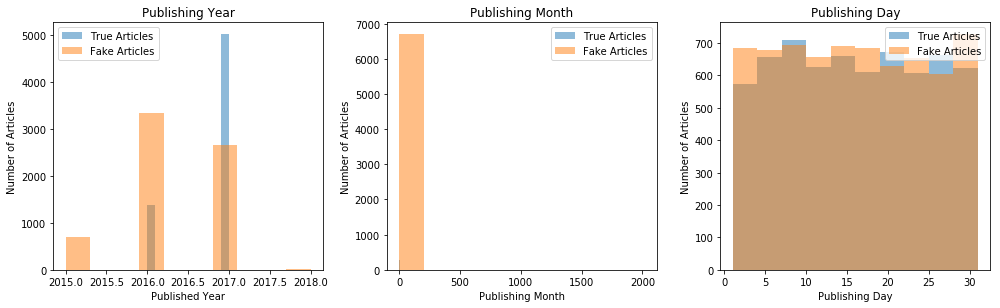

In [69]:
plt.subplots(1,3, figsize = (14,12))

# Making our first subplot
plt.subplot(3,3,1)
plt.title('Publishing Year')
plt.hist(true_df['Year'], alpha = 0.5, label = 'True Articles')
plt.hist(fake_df['Year'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Published Year')
plt.ylabel('Number of Articles')
plt.legend()

# Making our second subplot 
plt.subplot(3,3,2)
plt.title('Publishing Month')
plt.hist(true_df['Month'], alpha = 0.5, label = 'True Articles')
plt.hist(fake_df['Month'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Publishing Month')
plt.ylabel('Number of Articles')
plt.legend()

plt.subplot(3,3,3)
plt.title('Publishing Day')
plt.hist(true_df['Day'], alpha = 0.5, label = 'True Articles')
plt.hist(fake_df['Day'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Publishing Day')
plt.ylabel('Number of Articles')
plt.legend()


plt.tight_layout()
plt.show()

##### 2. Here we're going to visualize the plots above to see the change being made instead of pulling out columns directly

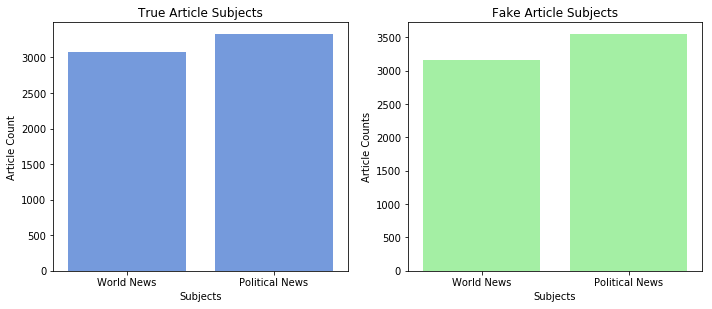

In [70]:
plt.subplots(1,2, figsize = (10,8))

# Making our first subplot
plt.subplot(2,2,1)
plt.title('True Article Subjects')
sns.countplot(true_df['subject'], color = 'cornflowerblue')
plt.xlabel('Subjects')
plt.ylabel('Article Count')

# Making our second subplot 
plt.subplot(2,2,2)
plt.title('Fake Article Subjects')
sns.countplot(fake_df['subject'], color = 'palegreen')
plt.xlabel('Subjects')
plt.ylabel('Article Counts')

plt.tight_layout()
plt.show()

Above we can see that since the binary creation of the column and as mentioned earlier, the subjects are fairly similar in terms of proportions

##### 3. Labelling the Datasets 

Here we're going to label our true and fake articles as 1 and 0 respectively in order to be able to identify correctly when combining our dataframes.

In [71]:
# Adding a column of ones in the True Data Frames to identify True as class 1
true_df['label'] = '1' 

In [72]:
# Adding a column of zeros in the True Data Frames to identify True as class 0
fake_df['label'] = '0'

In [73]:
# Sanity to check if the label column has been added
true_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day,label
0,spanish prosecutor asks for catalan police chi...,madrid reuters spain s state prosecutor has a...,World News,2017-10-16,12,50,2017,10,16,1
1,germany to spend million euros to help clear ...,berlin reuters germany will spend an initial ...,World News,2017-11-17,13,166,2017,11,17,1
2,nato chief says europe has interest in helping...,kabul reuters nato countries have strong reas...,World News,2017-09-27,9,403,2017,9,27,1
3,myanmar faces defining moment must stop the vi...,london reuters myanmar is facing a defining ...,World News,2017-09-14,9,192,2017,9,14,1
4,iran says weaponry displayed by haley is fabri...,united nations reuters iran rejected as unfou...,World News,2017-12-14,8,111,2017,12,14,1


In [74]:
# Sanity to check if the label column has been added
fake_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day,label
0,super bowl qb peyton manning bankrolling this...,when you sit down to watch the super bowl cont...,World News,2016-02-06,12,369,2016.0,2.0,6.0,0
1,republican compares lincoln to hitler this ti...,whitewashing hitler and the holocaust seems to...,World News,2017-04-12,12,465,2017.0,4.0,12.0,0
2,the rockettes are hitting back at being force...,with no one wanting to perform for donald trum...,World News,2016-12-23,17,562,2016.0,12.0,23.0,0
3,george zimmerman is selling the gun he used t...,updatethe listing has been removed and zimmerm...,World News,2016-05-12,17,483,2016.0,5.0,12.0,0
4,vigilante pirates intercede where government f...,like the soldiers of oden vigilante group we r...,Political News,2016-04-01,12,746,2016.0,4.0,1.0,0


**Before we combine the two DataFrames together, how about we look at the top and bottom 20 words. Let's do this below:**

**Disclaimer:** We'll perform these vectorizations together and print it separately so things might get messy. However, on the plus side, we'll identify the words that are repetitive in the articles. 

In [75]:
%%time 
# Setting up our variables
X_true = true_df['text']
X_fake = fake_df['text']

# Instantiating the true and fake vectorizers
true_vectorizer = CountVectorizer(stop_words = 'english')
fake_vectorizer = CountVectorizer(stop_words = 'english')

# Fitting the Vectorizer for the two
true_vectorizer.fit(X_true)
fake_vectorizer.fit(X_fake)

# Transforming X_true and X_fake
X_true = true_vectorizer.transform(X_true)
X_fake = fake_vectorizer.transform(X_fake)

print('Time taken to vectorize:')

Time taken to vectorize:
CPU times: user 11.2 s, sys: 233 ms, total: 11.4 s
Wall time: 13.2 s


In [76]:
# We extract the information and put it in a data frame
true_vectorizer_df = pd.DataFrame(columns=true_vectorizer.get_feature_names(),\
                                     data=X_true.toarray())

fake_vectorizer_df = pd.DataFrame(columns=fake_vectorizer.get_feature_names(),\
                                     data=X_fake.toarray())

In [77]:
# Creating the dataframe and summing across axis 0 to get the count of words
true_word_count_df = pd.DataFrame(true_vectorizer_df.sum(axis = 0).reset_index())
fake_word_count_df = pd.DataFrame(fake_vectorizer_df.sum(axis = 0).reset_index())

# Renaming the columns
true_word_count_df.columns = ['Word', 'Word Count']
fake_word_count_df.columns = ['Word', 'Word Count']

# Resetting the index for this new dataframe
true_word_count_df.reset_index(inplace = True, drop = True)
fake_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
top_20_true_words = true_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)
top_20_fake_words = fake_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

# Getting the bottom 20 words for both
bottom_20_true_words = true_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)
bottom_20_fake_words = fake_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)

I wanted to display the two dataframes side by side so below we're going to define a function and then pull those two dataframes side by side. This function was found on Stack Overflow can be found by clicking [here](https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side).

In [78]:
from IPython.display import display_html
# Defining the function
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [79]:
# Displaying the two dataframes created above with a side by side function created above too
display_side_by_side(top_20_true_words, top_20_fake_words)

,Word,Word Count
35427,said,29958
41940,trump,16397
34361,reuters,8537
31494,president,7888
38692,state,6017
16760,government,5572
38730,states,5081
18819,house,4926
27379,new,4799
42830,united,4779


In [80]:
# Displaying the two dataframes created above with a side by side function created above too
display_side_by_side(bottom_20_true_words, bottom_20_fake_words)

,Word,Word Count
45755,émigré,1
16356,ghanaian,1
34876,rogerpetit,1
16353,ghadr,1
16352,gfsbern,1
16351,gfk,1
16350,gfi,1
16349,gfa,1
16357,ghanam,1
16348,geziscale,1


<Figure size 720x720 with 0 Axes>

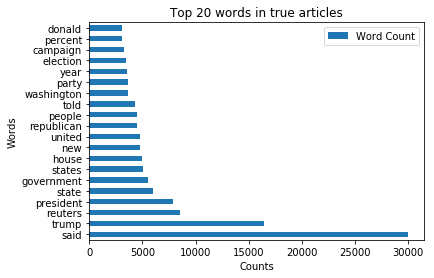

In [81]:
# Plotting out the top word counts from our true articles
# We also wanted to see the top words but decided not to as many of them are repeated only once. 
plt.figure(figsize = (10,10))
top_20_true_words.plot.barh(x = 'Word', y = 'Word Count')
plt.title('Top 20 words in true articles')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

<Figure size 720x720 with 0 Axes>

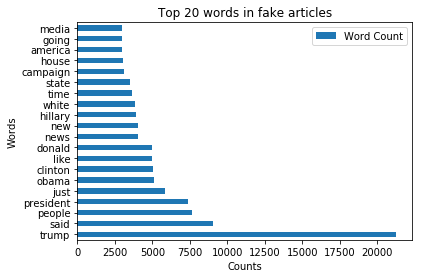

In [82]:
# Plotting out the top word counts from our true articles
# We also wanted to see the top words but decided not to as many of them are repeated only once. 
plt.figure(figsize = (10,10))
top_20_fake_words.plot.barh(x = 'Word', y = 'Word Count')
plt.title('Top 20 words in fake articles')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

While we're here, how about we go ahead and create a list of stop words so our models that we run do not have these words. We will pick up the a few words from both data frames (specifically where they overlap) and remove these below:

In [83]:
# Here we're going to import nltk stopwords and assigning it to a listofstopwords so we can extend the list and
# add more words to it, words that we see above which may overlap as well as the ones pulled out from the wordcloud. 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
listofstopwords = list(stopwords)
listofstopwords.extend(('said','trump','reuters','president','state','government','states','new','house','united',
                       'clinton','obama','donald','like','news','just', 'campaign', 'washington', 'election',
                        'party', 'republican', 'image', 'just'))



[nltk_data] Downloading package stopwords to /Users/AlyB/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Taking a look at the list of stopwords we've created including these additional words
print(listofstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### 4. Combining the dataframes

In [85]:
# Finally, we're going to combine the dataframes for the true and fake articles
combined_df = pd.concat([true_df, fake_df])
combined_df.head()

,title,text,subject,date,Title Word Count,Text Word Count,Year,Month,Day,label
0,spanish prosecutor asks for catalan police chi...,madrid reuters spain s state prosecutor has a...,World News,2017-10-16,12,50,2017.0,10.0,16.0,1
1,germany to spend million euros to help clear ...,berlin reuters germany will spend an initial ...,World News,2017-11-17,13,166,2017.0,11.0,17.0,1
2,nato chief says europe has interest in helping...,kabul reuters nato countries have strong reas...,World News,2017-09-27,9,403,2017.0,9.0,27.0,1
3,myanmar faces defining moment must stop the vi...,london reuters myanmar is facing a defining ...,World News,2017-09-14,9,192,2017.0,9.0,14.0,1
4,iran says weaponry displayed by haley is fabri...,united nations reuters iran rejected as unfou...,World News,2017-12-14,8,111,2017.0,12.0,14.0,1


In [86]:
# Before we move on, we will also once again reset the index on our combined dataframe
combined_df.reset_index(drop = True, inplace = True)

In [87]:
# Printing out the shapes of our three dataframes
print(f'The true articles dataframe shape: {true_df.shape}')
print(f'The fake articles dataframe shape: {fake_df.shape}')
print(f'The combined articles dataframe shape: {combined_df.shape}')

The true articles dataframe shape: (6402, 10)
The fake articles dataframe shape: (6705, 10)
The combined articles dataframe shape: (13107, 10)


We've now come to a point where we've explored our dataset rigorously and have made a few changes. Let's review the things we've seen and done up till now:
1. Dropped duplicated values
2. Cleaned our data frame subjects column.
3. Visualized the different subject for articles present in our document term matrix. 
4. Changed our data types for our date columns and split it into three columns. 
5. Visualized our distributions for the day the articles were published.
6. Did some sanity checks to ensure the changes that we made were applied.
7. Did some visualizations to see what some of the top words in our two data frames are.
8. Labeled our data frames, true articles as 1, fake articles as 0.
9. Finally, combined our data frames.

In [88]:
# Before we move on to selecting our columns, I want to make a copy of this CSV as well
combined_df.to_csv('combined_articles.csv')

# Vectorization

##### Building a personalized Tokenizer to get make the following changes to our text:
- Splitting words
- Remove stopwords


In [89]:
# Building a tokenizer to clean our data using stemming:
stemmer = PorterStemmer()

def my_stemming_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
        
    # Creating a list to hold these words
    listofstemmed_words = []
    
    for word in listofwords:
        if (not word in listofstopwords) and (word != ''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
            
    return listofstemmed_words
    

In [90]:
# Building a tokenizer to clean our data using lemmatization:
lemmatizer = WordNetLemmatizer()

def my_lemmatization_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
        
    listoflemmatized_words = []
    
    
    for word in listofwords:
        if (not word in listofstopwords) and (word != ''):
            lemmatized_word = lemmatizer.lemmatize(word)
            listoflemmatized_words.append(lemmatized_word)
            
    return listoflemmatized_words
        

We have successfully built the two different tokenizers we will be using for our vectorization right below:

**Below we will do 6 different vectorization in order to see which gives us the best results and depiction of articles**. These four are as follows:

- Vectorization using the Bag of Words model:
    - Using only removing stopwords and keeping a min_df
    - Using Stemming techniques
    - Using Lemmatization techniques 
    
  
- Vectorization using the TF-IDF model:
    - Using only removing stopwords and keeping a min_df
    - Using Stemming techniques
    - Using Lemmatization techniques 

The parameters we will be using is as follows:
- **```tokenizer```** as **my_stemming_tokenizer** for both techniques 
- **```tokenizer```** as **my_lemmatization_tokenizer** for both techniques
- **``min_df``** as 500
- **``stopwords``** as 'english' and 'listofstopwords'

Upon exploration, we did realize some of the things that might have to be cleaned up from our text prior to modelling are as follows:

- **Punctuation** has to be removed
- Text must be in **lowercase**
- **Tags** have to be removed
- **HTML** links have to be removed
- **Numbers or Digits WILL NOT BE REMOVED** 
- Many **stopwords** are also present which will have to be removed as well.
- **Stemming or Lemmatization** has to be done
    - We will use two different tokenizers to idenitfy which gives us better and more human readable results 
        - Stemming 
        - Lemmatization


However, before we move on to building a tokenizer, let's add the list of words from the ones seen in the word cloud above so that our model has lesser bias. 


##### We will be using the BagofWords Model to vectorize our tokens (words) below: 
    - 1. Using only stopwords and min_df 
    - 2. Using Stemming techniques 
    - 3. Using Lemmatization techniques

**Let's now select the two columns we'll be working with in terms of the target and feature variables. We're also going to do a training and testing split here so that we don't sneak into the test set**

In [91]:
# First, we set up are target and feature variables
# Setting up the features 
X = combined_df['text']

# Setting up our target
y = combined_df['label']


# Let's now finally do a train test split. 
# We will stratify in order to ensure our data is equally split for both true and false articles within the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

**Let's take a look at our X features and y target variables shape below along with the split training and testing set shapes before we get into vectorizing:

In [92]:
# Printing out some statements to see the shapes
# printing out the shape of the features and target variables set above
print(f'The shape of our features are: {X.shape}')
print(f'The shape of our features are: {y.shape}')

# Printing a few statements to see the size after the split. 
print('Training set size:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

print('\n') # New line to seperate the two

print('Testing set size:')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

The shape of our features are: (13107,)
The shape of our features are: (13107,)
Training set size:
X_train: (9174,)
y_train: (9174,)


Testing set size:
X_test: (3933,)
y_test: (3933,)


**1. Using only min_df and stopwords with a Count Vectorizer**

In [93]:
%%time
# Instantiating the Vectorizer 
simple_vectorizer = CountVectorizer(min_df = 500, stop_words = 'english')

# Fitting the Vectorizer
simple_vectorizer.fit(X_train)

# Transforming X_train
X_train_simple_vectorizer = simple_vectorizer.transform(X_train)

# Transforming X_test
X_test_simple_vectorizer = simple_vectorizer.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 9.54 s, sys: 310 ms, total: 9.85 s
Wall time: 11 s


In [94]:
# We extract the information and put it in a data frame
simple_vectorizer_df = pd.DataFrame(columns=simple_vectorizer.get_feature_names(),\
                                     data=X_train_simple_vectorizer.toarray())
display(simple_vectorizer_df)

,able,according,accused,act,action,actions,actually,added,adding,administration,...,words,work,working,world,wrote,year,yearold,years,york,young
0,1,0,0,1,0,0,0,1,0,0,...,0,1,2,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0,2,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
9170,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9171,0,0,1,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,0,4,0
9172,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Creating the dataframe and summing across axis 0 to get the count of words
BOG_word_count_df = pd.DataFrame(simple_vectorizer_df.sum(axis = 0).reset_index())

# Renaming the columns
BOG_word_count_df.columns = ['Word', 'Word Count']

# Resetting the index for this new dataframe
BOG_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
BOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

,Word,Word Count
349,said,27243
413,trump,26316
310,president,10580
293,people,8548
379,state,6674
273,new,6186
341,reuters,5991
174,house,5644
111,donald,5622
155,government,5571


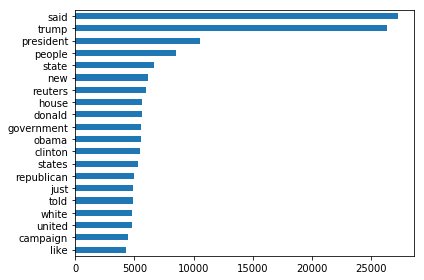

In [96]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_simple_vectorizer.todense(), columns=simple_vectorizer.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

**2. Using Stemming techniques and Bag of Words model**

In [97]:
%%time
# Instantiating the Vectorizer 
bagofwords_vectorizer_stemming = CountVectorizer(min_df = 500, tokenizer = my_stemming_tokenizer)

# Fitting the Vectorizer
bagofwords_vectorizer_stemming.fit(X_train)

# Transforming X_train
X_train_bagofwords_stemmed = bagofwords_vectorizer_stemming.transform(X_train)

# Transforming X_test
X_test_bagofwords_stemmed = bagofwords_vectorizer_stemming.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 38min 7s, sys: 4.55 s, total: 38min 11s
Wall time: 38min 30s


Checking the results from our stemming vectorizer 

In [98]:
# Converting the sparse matrix above to an array so we can put it within a dataframe
X_train_bagofwords_stemmed.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [99]:
# We extract the information and put it in a data frame
bagofwords_stemmed_df = pd.DataFrame(columns=bagofwords_vectorizer_stemming.get_feature_names(),\
                                     data=X_train_bagofwords_stemmed.toarray())
display(bagofwords_stemmed_df)

,abl,accept,access,accord,account,accus,across,act,action,activ,...,would,wrote,year,yearold,yet,york,young,“i,“the,“we
0,1,0,0,0,0,0,1,1,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,3,0,0,0,0,1,0,0,2,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0,0,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9170,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9171,0,0,3,0,0,2,1,0,0,0,...,9,0,0,0,0,4,0,0,0,0
9172,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


While we're at it, let's also take a look at the most frequently occuring words in our dataset using the bag of words stemming technique.

In [100]:
# Creating the dataframe and summing across axis 0 to get the count of words
stemmedBOG_word_count_df = pd.DataFrame(bagofwords_stemmed_df.sum(axis = 0).reset_index())

# Renaming the columns
stemmedBOG_word_count_df.columns = ['Word', 'Word Count']

# Resetting the index for this new dataframe
stemmedBOG_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
stemmedBOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

,Word,Word Count
566,us,12748
598,would,11238
397,peopl,8440
473,say,7501
382,one,7389
600,year,7024
30,also,6386
455,report,5714
149,democrat,5694
545,time,5513


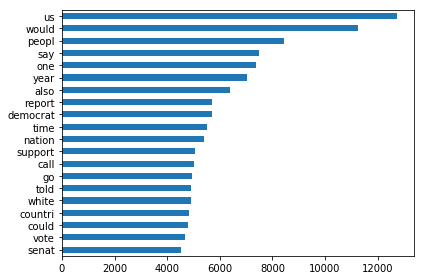

In [101]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_bagofwords_stemmed.todense(), columns=bagofwords_vectorizer_stemming.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

**3. Using Lemmatization techniques and Bag of Words model**

In [102]:
%%time
# Instantiating the Vectorizer 
bagofwords_vectorizer_lemmatization = CountVectorizer(min_df = 500, tokenizer = my_lemmatization_tokenizer)

# Fitting the Vectorizer
bagofwords_vectorizer_lemmatization.fit(X_train)

# Transforming X_train
X_train_bagofwords_lemmatized = bagofwords_vectorizer_lemmatization.transform(X_train)

# Transforming X_test
X_test_bagofwords_lemmatized = bagofwords_vectorizer_lemmatization.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 36min 54s, sys: 6.31 s, total: 37min
Wall time: 37min 14s


Checking the results from our Lemmatization Vectorization

In [103]:
# Converting the sparse matrix above to an array so we can put it within a dataframe
X_train_bagofwords_lemmatized.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [104]:
# We extract the information and put it in a data frame
bagofwords_lemmatized_df = pd.DataFrame(columns=bagofwords_vectorizer_lemmatization.get_feature_names(),\
                                     data=X_train_bagofwords_lemmatized.toarray())
display(bagofwords_lemmatized_df)

,able,according,account,accused,across,act,action,actually,added,adding,...,would,wrote,year,yearold,yet,york,young,“i,“the,“we
0,1,0,0,0,1,1,0,0,1,0,...,2,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,3,0,0,0,0,1,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9170,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9171,0,0,0,1,1,0,0,2,0,0,...,9,0,0,0,0,4,0,0,0,0
9172,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Again, let's also take a look at the most frequently occuring words in our dataset using the bag of words lemmatization technique.

In [105]:
# Creating the dataframe and summing across axis 0 to get the count of words
lemmatizedBOG_word_count_df = pd.DataFrame(bagofwords_stemmed_df.sum(axis = 0).reset_index())

# Renaming the columns
lemmatizedBOG_word_count_df.columns = ['Word', 'Word Count']

# Resetting the index for this new dataframe
lemmatizedBOG_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
lemmatizedBOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

,Word,Word Count
566,us,12748
598,would,11238
397,peopl,8440
473,say,7501
382,one,7389
600,year,7024
30,also,6386
455,report,5714
149,democrat,5694
545,time,5513


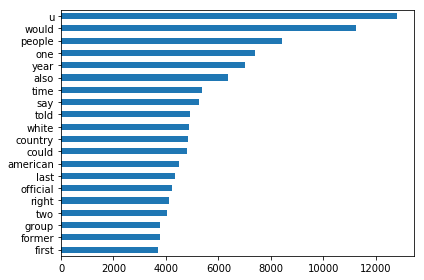

In [106]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_bagofwords_lemmatized.todense(), columns=bagofwords_vectorizer_lemmatization.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

##### We will be using the TFIDF Model to vectorize our tokens (words) below:
    - 1. Using only min_df and stopwords
    - 2. Using Stemming techniques 
    - 3. Using Lemmatization techniques

**1. Using only min_df and stopwords with a Tfidf Vectorizer**

In [107]:
%%time
# Instantiating the Vectorizer 
simple_vectorizer_tfidf = TfidfVectorizer(min_df = 500, stop_words = 'english')

# Fitting the Vectorizer
simple_vectorizer_tfidf.fit(X_train)

# Transforming X_train
X_train_simple_vectorizer_tfidf = simple_vectorizer_tfidf.transform(X_train)

# Transforming X_test
X_test_simple_vectorizer_tfidf = simple_vectorizer_tfidf.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 8.43 s, sys: 273 ms, total: 8.7 s
Wall time: 9.26 s


In [108]:
# We extract the information and put it in a data frame
tfidf_df = pd.DataFrame(columns=simple_vectorizer_tfidf.get_feature_names(),\
                                     data=X_train_simple_vectorizer_tfidf.toarray())
display(tfidf_df)

,able,according,accused,act,action,actions,actually,added,adding,administration,...,words,work,working,world,wrote,year,yearold,years,york,young
0,0.058778,0.000000,0.000000,0.056459,0.000000,0.0,0.000000,0.054099,0.0,0.000000,...,0.0,0.048099,0.111591,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.103357,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.165468,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.041320,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.049383,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0.000000,0.121552,0.081267,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.127737,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.056567,0.000000,0.0
9170,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.078387,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
9171,0.000000,0.000000,0.033867,0.000000,0.000000,0.0,0.064290,0.000000,0.0,0.000000,...,0.0,0.000000,0.031757,0.000000,0.0,0.0,0.0,0.000000,0.121079,0.0
9172,0.000000,0.000000,0.000000,0.000000,0.079758,0.0,0.076783,0.000000,0.0,0.063576,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [109]:
# Creating the dataframe and summing across axis 0 to get the count of words
tfidf_word_count_df = pd.DataFrame(tfidf_df.sum(axis = 0).reset_index())

# Renaming the columns
tfidf_word_count_df.columns = ['Word', 'Word Weightage']

# Resetting the index for this new dataframe
tfidf_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

,Word,Word Weightage
413,trump,1052.516283
349,said,882.612961
310,president,452.471400
293,people,388.385239
379,state,338.007765
341,reuters,329.358235
62,clinton,328.127923
281,obama,310.625771
174,house,305.201279
155,government,304.019659


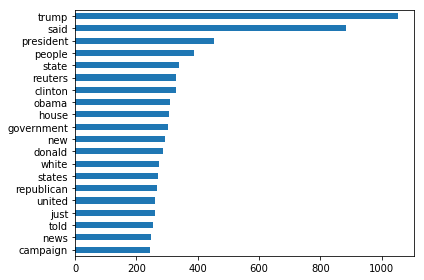

In [110]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_simple_vectorizer_tfidf.todense(), columns=simple_vectorizer_tfidf.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

**2. Using Stemming techniques using the TF-IDF model**

In [111]:
%%time
# Instantiating the Vectorizer 
tfidf_vectorizer_stemming = TfidfVectorizer(min_df = 500, tokenizer = my_stemming_tokenizer)

# Fitting the Vectorizer
tfidf_vectorizer_stemming.fit(X_train)

# Transforming X_train
X_train_tfidf_stemmed = tfidf_vectorizer_stemming.transform(X_train)

# Transforming X_test
X_test_tfidf_stemmed = tfidf_vectorizer_stemming.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 38min 21s, sys: 5.99 s, total: 38min 27s
Wall time: 38min 55s


Checking the results from stemming using the TF-IDF vectorizer 

In [112]:
# Converting the sparse matrix above to an array so we can put it within a dataframe
X_train_tfidf_stemmed.toarray()

array([[0.05384714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.13263384, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15690074]])

In [113]:
# We extract the information and put it in a data frame
tfidf_stemming_df = pd.DataFrame(columns=tfidf_vectorizer_stemming.get_feature_names(),\
                                     data=X_train_tfidf_stemmed.toarray())
display(tfidf_stemming_df)

,abl,accept,access,accord,account,accus,across,act,action,activ,...,would,wrote,year,yearold,yet,york,young,“i,“the,“we
0,0.053847,0.0,0.000000,0.000000,0.0,0.000000,0.052543,0.046416,0.000000,0.000000,...,0.050914,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.078095,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.039768,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076254,0.0,0.000000,0.0,0.0,0.048754,0.0,0.0,0.114411,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.224445,...,0.099284,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0.000000,0.0,0.000000,0.109521,0.0,0.064932,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.041003,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9170,0.000000,0.0,0.101244,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9171,0.000000,0.0,0.132634,0.000000,0.0,0.070148,0.039022,0.000000,0.000000,0.000000,...,0.170153,0.0,0.000000,0.0,0.0,0.145052,0.0,0.0,0.000000,0.000000
9172,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.061563,0.000000,...,0.033035,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


Again, let's also take a look at the most frequently occuring words in our dataset using the TF-IDF stemming technique.

In [114]:
# Creating the dataframe and summing across axis 0 to get the count of words
stemmed_tfidf_word_count_df = pd.DataFrame(tfidf_stemming_df.sum(axis = 0).reset_index())

# Renaming the columns
stemmed_tfidf_word_count_df.columns = ['Word', 'Word Weightage']

# Resetting the index for this new dataframe
stemmed_tfidf_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
stemmed_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)


,Word,Word Weightage
566,us,461.703776
598,would,378.471048
397,peopl,335.669175
473,say,293.766235
382,one,280.579091
600,year,274.691386
455,report,271.571936
149,democrat,267.122361
574,vote,257.724537
588,white,257.328306


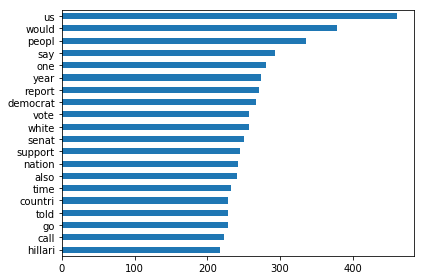

In [115]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_tfidf_stemmed.todense(), columns=tfidf_vectorizer_stemming.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

**3. Using Lemmatization techniques using the TF-IDF model**

In [116]:
%%time
# Instantiating the Vectorizer 
tfidf_vectorizer_lemmatization = TfidfVectorizer(min_df = 500, tokenizer = my_lemmatization_tokenizer)

# Fitting the Vectorizer
tfidf_vectorizer_lemmatization.fit(X_train)

# Transforming X_train
X_train_tfidf_lemmatized = tfidf_vectorizer_lemmatization.transform(X_train)

# Transforming X_test
X_test_tfidf_lemmatized = tfidf_vectorizer_lemmatization.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 36min 5s, sys: 3.7 s, total: 36min 9s
Wall time: 36min 17s


Checking the results from lemmatization using the TF-IDF vectorizer 

In [117]:
# Converting the sparse matrix above to an array so we can put it within a dataframe
X_train_tfidf_lemmatized.toarray()

array([[0.05497413, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08445426, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.20419382]])

In [118]:
# We extract the information and put it in a data frame
tfidf_lemmatized_df = pd.DataFrame(columns=tfidf_vectorizer_lemmatization.get_feature_names(),\
                                     data=X_train_tfidf_lemmatized.toarray())
display(tfidf_lemmatized_df)

,able,according,account,accused,across,act,action,actually,added,adding,...,would,wrote,year,yearold,yet,york,young,“i,“the,“we
0,0.054974,0.000000,0.0,0.000000,0.053622,0.050964,0.000000,0.000000,0.050614,0.0,...,0.051960,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.084454,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.041626,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.077950,0.0,0.000000,0.0,0.0,0.049838,0.0,0.0,0.116955,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.115573,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0.000000,0.126197,0.0,0.084373,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.046142,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9170,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.086626,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9171,0.000000,0.000000,0.0,0.043653,0.042060,0.000000,0.000000,0.082953,0.000000,0.0,...,0.183402,0.0,0.000000,0.0,0.0,0.156346,0.0,0.0,0.000000,0.000000
9172,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066306,0.072295,0.000000,0.0,...,0.035520,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


Again, let's also take a look at the most frequently occuring words in our dataset using the TF-IDF lemmatization technique.

In [119]:
# Creating the dataframe and summing across axis 0 to get the count of words
lemmatized_tfidf_word_count_df = pd.DataFrame(tfidf_lemmatized_df.sum(axis = 0).reset_index())

# Renaming the columns
lemmatized_tfidf_word_count_df.columns = ['Word', 'Word Weightage']

# Resetting the index for this new dataframe
lemmatized_tfidf_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
lemmatized_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

,Word,Word Weightage
479,u,506.002567
514,would,415.658871
335,people,368.887210
323,one,307.740294
516,year,303.077101
504,white,279.473343
25,also,265.350763
395,say,254.387583
100,country,252.045934
463,time,251.704499


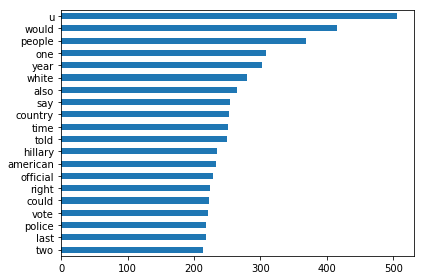

In [120]:
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train_tfidf_lemmatized.todense(), columns=tfidf_vectorizer_lemmatization.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

**We've now looked at the 6 different vectorization. These are as follows:**

1. Bagofwords Vectorization without stemming or lemmatization
2. Bagofwords Vectorization with stemming
3. Bagofwords Vectorization with lemmatization
4. Tfidf Vectorization without stemming or lemmatization
5. Tfidf Vectorization with stemming
6. Tfidf Vectorization with lemmatization

Let's take a moment to look at all these words below:

In [121]:
# Creating a list for all top words from our vectorizations

# List 1 - Top 20 words from BagofWords Vectorization 
top_20_words_df1 = BOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

# List 2 - Top 20 words from BagofWords Vectorization with Stemming and english stopwords 
top_20_words_df2 = stemmedBOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

# List 3 - Top 20 words from BagofWords Vectorization with Lemmatization and english stopwords 
top_20_words_df3 = lemmatizedBOG_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

# List 4 - Top 20 words from Tfidf Vectorization 
top_20_words_df4 = tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

# List 5 - Top 20 words from Tfidf Vectorization with Stemming and english stopwords 
top_20_words_df5 = stemmed_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

# List 6 - Top 20 words from Tfidf Vectorization with Lemmatization and english stopwords 
top_20_words_df6 = lemmatized_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)



In [122]:
display_side_by_side(top_20_words_df1,
                     top_20_words_df2, 
                     top_20_words_df3,
                     top_20_words_df4, 
                     top_20_words_df5,
                     top_20_words_df6)

,Word,Word Count
349,said,27243
413,trump,26316
310,president,10580
293,people,8548
379,state,6674
273,new,6186
341,reuters,5991
174,house,5644
111,donald,5622
155,government,5571


Now we will be moving on the modeling step. However, we must run our train_test_split again and do the tokenization of words choosing at our discretion prior to running the model 

In [123]:
# Adding more words to the listofstopwords
listofstopwords.extend(('say','obama','(reuters)','govern','news','united', 'states', '-', 'said', 'arent', 'couldnt',
                        'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent','isnt', 'mightnt', 'mustnt', 'neednt',
                        'shant', 'shes', 'shouldnt', 'shouldve','thatll', 'wasnt', 'werent', 'wont', 'wouldnt',
                        'youd','youll', 'youre', 'youve', 'trump', 'democrat', 'white', 'black', 'reuter', 'monday',
                        'tuesday','wednesday','thursday', 'friday','saturday','sunday'))

In [124]:
%%time
# Setting up our X-features and y-target variables again
X = combined_df['text']
y = combined_df['label']

# Splitting our data prior to modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)


# Vectorizing using a TFIDFVectorizer
tfidf_final = TfidfVectorizer(min_df = 500,
                              ngram_range = (1,2),\
                             tokenizer = my_lemmatization_tokenizer)

# Fitting our vectorizing on the training data
tfidf_final.fit(X_train)

# Tranforming our training data
X_train = tfidf_final.transform(X_train)

# Tranforming our testing data
X_test = tfidf_final.transform(X_test)

print('Time taken:')

Time taken:
CPU times: user 37min 12s, sys: 9.87 s, total: 37min 22s
Wall time: 38min 36s


In [125]:
# We extract the information and put it in a data frame
tfidf_final_df = pd.DataFrame(columns=tfidf_final.get_feature_names(),\
                                     data=X_train.toarray())
display(tfidf_final_df)

,able,according,account,accused,across,act,action,actually,added,adding,...,would,wrote,year,yearold,yet,york,young,“i,“the,“we
0,0.059635,0.000000,0.0,0.000000,0.058169,0.055285,0.00000,0.000000,0.054906,0.0,...,0.056365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.083826,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.042920,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.080374,0.0,0.000000,0.0,0.0,0.051388,0.0,0.0,0.120592,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.119497,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,0.000000,0.127194,0.0,0.085039,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.0,0.046507,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9170,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.086240,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9171,0.000000,0.000000,0.0,0.043734,0.042138,0.000000,0.00000,0.083107,0.000000,0.0,...,0.183744,0.0,0.000000,0.0,0.0,0.156638,0.0,0.0,0.000000,0.000000
9172,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.06675,0.072780,0.000000,0.0,...,0.035758,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [126]:
# Creating the dataframe and summing across axis 0 to get the count of words
final_tfidf_word_count_df = pd.DataFrame(tfidf_final_df.sum(axis = 0).reset_index())

# Renaming the columns
final_tfidf_word_count_df.columns = ['Word', 'Word Weightage']

# Resetting the index for this new dataframe
final_tfidf_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
final_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

,Word,Word Weightage
478,u,512.884902
511,would,420.324164
336,people,375.515727
324,one,311.591433
513,year,305.471675
25,also,268.621735
462,time,254.876317
99,country,254.456071
465,told,252.922001
196,hillary,237.607855


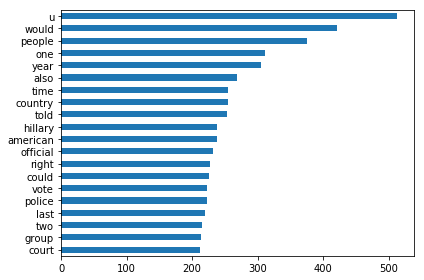

In [127]:
# Plotting the top 20 words from the final vectorizing 
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train.todense(), columns=tfidf_final.get_feature_names()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

We've now completed over 6 different vectorizers and have created a special list of stop words so that the model learns to predict whether an article is true or not based on the way it's written rather than the words that it has within the text. To recap what happened in the vectorization steps above, let's look at the numbered list below:

1. CountVectorizer with min_df and stopwords parameter
2. CountVectorizer with min_df, and stemming tokenizer
3. CountVectorizer with min_df, and lemmatization tokenizer
4. TfidfVectorizer with min_df and stopwords parameter
5. TFidfVectorizer with min_df and stemming tokenizer
6. TfidfVectorizer with min_df and lemmatization tokenizer
7. **Finally, we did our vectorizer using a tfidf_final which used the TfidfVectorizer along with a min_df of 500, ngram_range of (1,2) and using the lemmatization tokenizer as well.**

Before moving on, it would also be smart to pickle our lemmatization tokenizer, as well as the vectorizer itself so that if we decide to use an application to create an interface for human interaction, we don't have to repeat this step.

In [129]:
# Here we're going to do some pickling
# First we pickle our lemmatization tokenizer
joblib.dump(my_lemmatization_tokenizer, 'lemmatization_tokenizer.pkl')

# We're also going to pickle the vectorizer
joblib.dump(tfidf_final, 'TfidfVectorizer.pkl')

['TfidfVectorizer.pkl']

# Modeling

Before we move on to the modelling stage, the thought process was to create a gridsearch eventually and find the best model out there. However, to explore our options, we decided to go ahead and set up baseline models using many Machine Learning models that are listed below. 

At the end of the modelling process for each, we will try to identify the top words for the Logistic Regression model, including  and make an assumption that these are similar or very close as for all other models. 

Let's use the following models as our baseline models:

- Logistic Regression
- Logistic Regression with Standard Scaler 
- Decision Tree Classifier
- Random Forest Classifier
- K Nearest Neighbors with Standard Scaler  
- Neural Network - MLP Classifier
- Naive Bayes Classifier
- AdaBoost Classifier
- Support Vector Machines Classifier

### Logistic Regression

In [158]:
%%time

# Instantiating the Logistic Regression model
LR_model = LogisticRegression(solver = 'lbfgs',\
                              verbose = 1,\
                              n_jobs = -1)

# Fitting the Model
LR_model.fit(X_train, y_train)

# Scoring the model on training data 
LR_model.score(X_train, y_train)

# Scoring the model on test data
LR_model.score(X_test, y_test)

print(f'The training score using a Logistic Regression is: {LR_model.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'The testing score using a Logistic Regression is: {LR_model.score(X_test, y_test)}')
print('\n') # printing a blank line
print('Time taken to run the model:')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The training score using a Logistic Regression is: 0.9609766732068891


The testing score using a Logistic Regression is: 0.9544876684464785


Time taken to run the model:
CPU times: user 98.7 ms, sys: 20.3 ms, total: 119 ms
Wall time: 3.29 s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.2s finished


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1923           89
True 1           90         1831


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2012
           1       0.95      0.95      0.95      1921

    accuracy                           0.95      3933
   macro avg       0.95      0.95      0.95      3933
weighted avg       0.95      0.95      0.95      3933





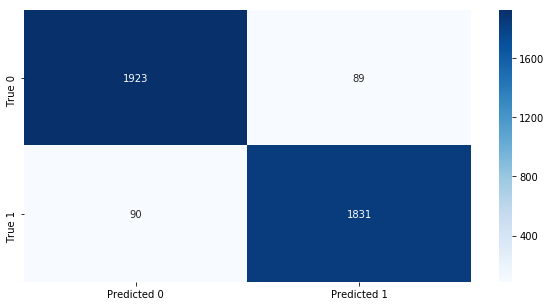

In [159]:
# Predicting our classes for our LR model as is
y_pred_LR = LR_model.predict(X_test)

# Setting up our confusion matrix 
LR_confusion_matrix = confusion_matrix(y_test,y_pred_LR)

# Putting the confusion matrix in a DataFrame
LR_confusion_matrix = pd.DataFrame(data = LR_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
LR_classification_report = classification_report(y_test,y_pred_LR)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(LR_confusion_matrix)
print('\n')
print('Classification Report')
print(LR_classification_report)
print('\n') # printing a blank line

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(LR_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

In [160]:
# Identifying the top predicitng words and their coefficients to see what words predict a real or fake article
names = tfidf_final.get_feature_names()
coefficients = LR_model.coef_[0]
df_LR = pd.DataFrame({'Coef': coefficients, 'Words': names}).sort_values(by = 'Coef',ascending = False)
df_LR.head(20)

,Coef,Words
471,8.589582,trump’s
518,6.361503,“i
519,5.646899,“the
520,4.949097,“we
297,4.152103,minister
428,3.828026,spokesman
432,3.456016,statement
466,3.178675,told reporter
383,2.831405,representative
377,2.705848,region


**Some of the words that predicts whether an article is true are shown below:**

<Figure size 432x288 with 0 Axes>

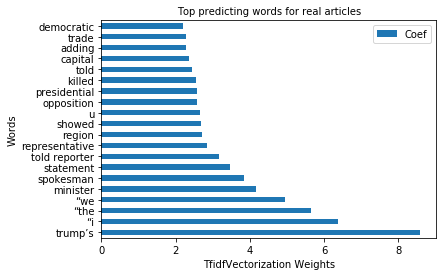

In [161]:
# Plotting the last 20 words to see what words make an article predict as true
plt.figure()
df_LR.head(20).plot.barh(x = 'Words', y = 'Coef')
plt.title('Top predicting words for real articles', fontsize = 10)
plt.xlabel('TfidfVectorization Weights')
plt.ylabel('Words')
plt.show()

**Some of the words that predicts whether an article is fake are shown below:**

<Figure size 432x288 with 0 Axes>

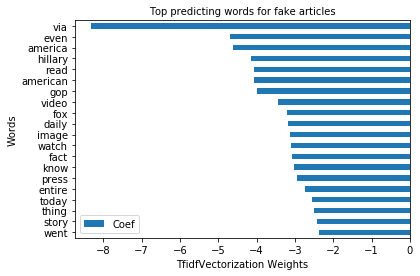

In [162]:
# Plotting the last 20 words to see what words make an article predict as fake
plt.figure()
df_LR.tail(20).plot.barh(x = 'Words', y = 'Coef')
plt.title('Top predicting words for fake articles', fontsize = 10)
plt.xlabel('TfidfVectorization Weights')
plt.ylabel('Words')
plt.show()

### Logistic Regression using StandardScaler 

A quick note here: We don't need to scale our data considering we're only working with a text column and don't need to do so as dimnesionality reduction is not needed. However, we're running this model to see whether or not scaling text data would make a difference or give us a better result or not when setting up our baseline models.

##### Setting up our Standard Scaler

In [163]:
# Applying PCA to the orignial k-dimensional data set
# Instantiating the Scaler
scaler = StandardScaler(with_mean = False)

# Fitting the Model
scaler.fit(X_train)

# Transforming the training set 
X_train_scaled = scaler.transform(X_train)

# Transforming the test set 
X_test_scaled = scaler.transform(X_test)

##### Running Logistic Regression on Scaled Data

In [164]:
%%time 

# Instantiating the Logistic Regression model
LRSS_model = LogisticRegression(solver = 'lbfgs',\
                                verbose = 1,\
                                n_jobs = -1)

# Fitting the Model
LRSS_model.fit(X_train_scaled, y_train)

# Scoring the model on training data 
LRSS_model.score(X_train_scaled, y_train)

# Scoring the model on test data
LRSS_model.score(X_test_scaled, y_test)


print(f'The training score using a Logistic Regression using PCA is: {LRSS_model.score(X_train_scaled, y_train)}')
print('\n') # printing a blank line
print(f'The testing score using a Logistic Regression using PCA is: {LRSS_model.score(X_test_scaled, y_test)}')
print('\n') # printing a blank line
print('Time taken to run the model:')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The training score using a Logistic Regression using PCA is: 0.9784172661870504


The testing score using a Logistic Regression using PCA is: 0.9460971268751589


Time taken to run the model:
CPU times: user 90.4 ms, sys: 12.1 ms, total: 103 ms
Wall time: 553 ms


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1923           89
True 1           90         1831


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2012
           1       0.93      0.96      0.95      1921

    accuracy                           0.95      3933
   macro avg       0.95      0.95      0.95      3933
weighted avg       0.95      0.95      0.95      3933



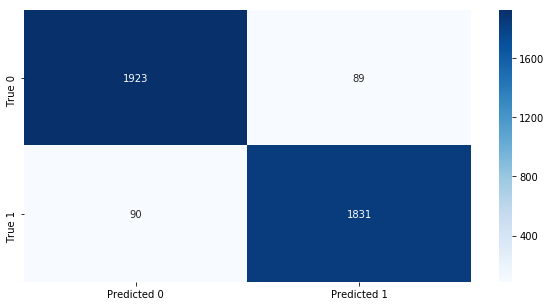

In [165]:
# Predicting our classes for our LR model as is
y_pred_LRSS = LRSS_model.predict(X_test)

# Setting up our confusion matrix 
LRSS_confusion_matrix = confusion_matrix(y_test,y_pred_LRSS)

# Putting the confusion matrix in a DataFrame
LRSS_confusion_matrix = pd.DataFrame(data = LR_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
LRSS_classification_report = classification_report(y_test,y_pred_LRSS)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(LR_confusion_matrix)
print('\n')
print('Classification Report')
print(LRSS_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(LR_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

In [166]:
# Identifying the top predicitng words and their coefficients to see what words predict a real or fake article
names = tfidf_final.get_feature_names()
coefficients = LRSS_model.coef_[0]
df_LRSS = pd.DataFrame({'Coef': coefficients, 'Words': names}).sort_values(by = 'Coef',ascending = False)
df_LRSS.head(20)

,Coef,Words
471,3.988687,trump’s
518,2.604054,“i
519,2.278733,“the
520,1.919909,“we
297,0.868903,minister
377,0.643459,region
355,0.614851,prime minister
428,0.595356,spokesman
432,0.593273,statement
327,0.591607,opposition


<Figure size 432x288 with 0 Axes>

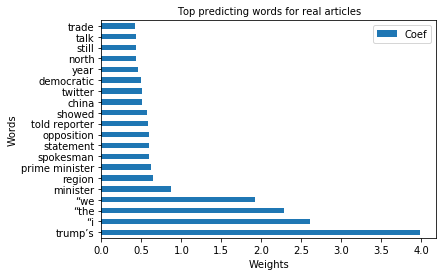

In [167]:
# Plotting the last 20 words to see what words make an article predict as true
plt.figure()
df_LRSS.head(20).plot.barh(x = 'Words', y = 'Coef')
plt.title('Top predicting words for real articles', fontsize = 10)
plt.xlabel('Weights')
plt.ylabel('Words')
plt.show()

<Figure size 432x288 with 0 Axes>

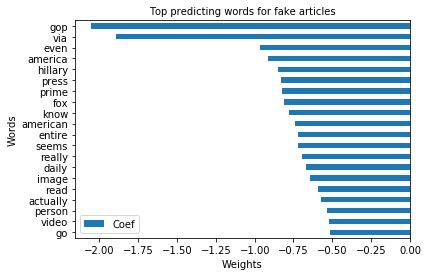

In [168]:
# Plotting the last 20 words to see what words make an article predict as fake
plt.figure()
df_LRSS.tail(20).plot.barh(x = 'Words', y = 'Coef')
plt.title('Top predicting words for fake articles', fontsize = 10)
plt.xlabel('Weights')
plt.ylabel('Words')
plt.show()

One quick observation that I wanted to state here is that as mentioned earlier, the scaling doesn't seem to work on text data and may be of no specific use. This can be seen by looking at the two confusion printed for the Logistic Regression and the Scaled Logistic Regression. The number of true positives and true negatives are equivalent and so are the number of false positives and false negatives.

### Decision Tree Classifier

In [169]:
%%time
# Instantiating the Decision Tree Classifier model
DT_model = DecisionTreeClassifier(max_depth = 5)

# Fitting the Model
DT_model.fit(X_train, y_train)

# Scoring the model on training data
DT_model.score(X_train, y_train)

# Scoring the model on test data
DT_model.score(X_test, y_test)

print(f'The training score using a Decision Tree Classifier is: {DT_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Decision Tree Classifier is: {DT_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Decision Tree Classifier is: 0.8003052103771529


The testing score using a Decision Tree Classifier is: 0.7930333079074497


Time taken to run the model:
CPU times: user 419 ms, sys: 10.9 ms, total: 430 ms
Wall time: 461 ms


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1923           89
True 1           90         1831


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      2012
           1       0.72      0.93      0.81      1921

    accuracy                           0.79      3933
   macro avg       0.82      0.80      0.79      3933
weighted avg       0.82      0.79      0.79      3933



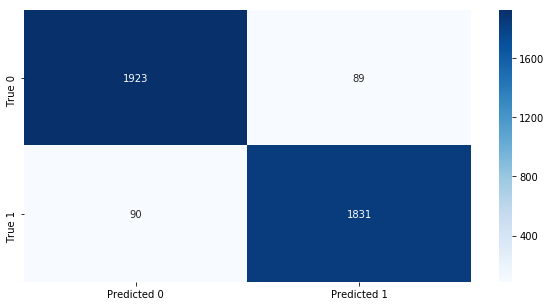

In [170]:
# Predicting our classes for our DT model as is
y_pred_DT = DT_model.predict(X_test)

# Setting up our confusion matrix 
DT_confusion_matrix = confusion_matrix(y_test,y_pred_DT)

# Putting the confusion matrix in a DataFrame
DT_confusion_matrix = pd.DataFrame(data = LR_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
DT_classification_report = classification_report(y_test,y_pred_DT)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(DT_confusion_matrix)
print('\n')
print('Classification Report')
print(DT_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(DT_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

### Random Forest Classifier

In [171]:
%%time

# Instantiating the Random Forest Classifier model
RF_model = RandomForestClassifier(max_depth = 5,\
                                  n_jobs = -1)

# Fitting the Model
RF_model.fit(X_train, y_train)

# Scoring the model on training data
RF_model.score(X_train, y_train)

# Scoring the model on test data
RF_model.score(X_test, y_test)

print(f'The training score using a Random Forest Classifier is: {RF_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Random Forest Classifier is: {RF_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

/Users/AlyB/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The training score using a Random Forest Classifier is: 0.8889252234575976


The testing score using a Random Forest Classifier is: 0.886092041698449


Time taken to run the model:
CPU times: user 376 ms, sys: 28.9 ms, total: 405 ms
Wall time: 665 ms


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1682          330
True 1          118         1803


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2012
           1       0.85      0.94      0.89      1921

    accuracy                           0.89      3933
   macro avg       0.89      0.89      0.89      3933
weighted avg       0.89      0.89      0.89      3933





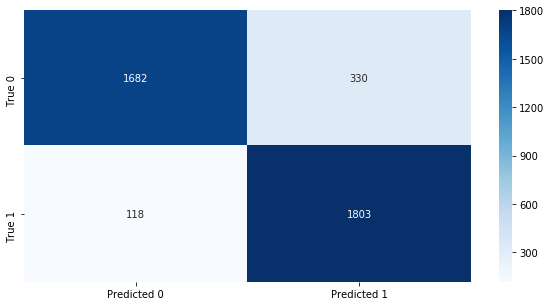

In [172]:
# Predicting our classes for our RF model as is
y_pred_RF = RF_model.predict(X_test)

# Setting up our confusion matrix 
RF_confusion_matrix = confusion_matrix(y_test,y_pred_RF)

# Putting the confusion matrix in a DataFrame
RF_confusion_matrix = pd.DataFrame(data = RF_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
RF_classification_report = classification_report(y_test,y_pred_RF)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(RF_confusion_matrix)
print('\n')
print('Classification Report')
print(RF_classification_report)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(RF_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

### K Nearest Neighbors

This model requires us to scale the data and we previously did this when we were running a Logistic Regression model using PCA. Hence, we will use this to fit our model:
- `X_train_scaled`
- `X_test_scaled`


In [189]:
%%time
# Instantiating the K Nearest Neighbors model
KNN_model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

# Fitting the Model
KNN_model.fit(X_train_scaled, y_train)

# Scoring the model on training data
KNN_model.score(X_train_scaled, y_train)

# Scoring the model on test data
KNN_model.score(X_test_scaled, y_test)

print(f'The training score using a K Nearest Neighbors is: {KNN_model.score(X_train_scaled, y_train)}')
print('\n')
print(f'The testing score using a K Nearest Neighbors is: {KNN_model.score(X_test_scaled, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a K Nearest Neighbors is: 0.8896882494004796


The testing score using a K Nearest Neighbors is: 0.8029494024917366


Time taken to run the model:
CPU times: user 37 s, sys: 9.22 s, total: 46.2 s
Wall time: 26.1 s


/Users/AlyB/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix
        Predicted 0  Predicted 1
True 0         2012            0
True 1         1921            0


Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2012
           1       0.00      0.00      0.00      1921

    accuracy                           0.51      3933
   macro avg       0.26      0.50      0.34      3933
weighted avg       0.26      0.51      0.35      3933





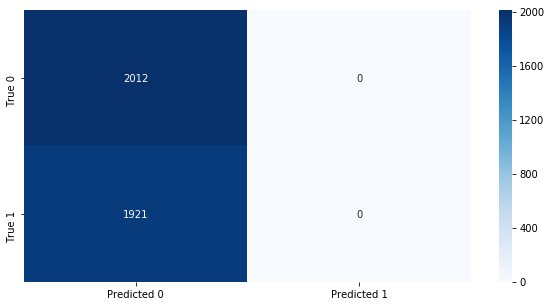

In [190]:
# Predicting our classes for our LR model as is
y_pred_KNN = KNN_model.predict(X_test)

# Setting up our confusion matrix 
KNN_confusion_matrix = confusion_matrix(y_test,y_pred_KNN)

# Putting the confusion matrix in a DataFrame
KNN_confusion_matrix = pd.DataFrame(data = KNN_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
KNN_classification_report = classification_report(y_test,y_pred_KNN)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(KNN_confusion_matrix)
print('\n')
print('Classification Report')
print(KNN_classification_report)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(KNN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()


### Neural Network

In [191]:
%%time
# Instantiating the Neural Network model
NN_model = MLPClassifier()

# Fitting the Model
NN_model.fit(X_train, y_train)

# Scoring the model on training data
NN_model.score(X_train, y_train)

# Scoring the model on test data
NN_model.score(X_test, y_test)

print(f'The training score using a Neural Network is: {NN_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Neural Network is: {NN_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Neural Network is: 0.999890996293874


The testing score using a Neural Network is: 0.9524535977625223


Time taken to run the model:
CPU times: user 56.2 s, sys: 1.27 s, total: 57.5 s
Wall time: 34.9 s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1920           92
True 1           95         1826


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2012
           1       0.95      0.95      0.95      1921

    accuracy                           0.95      3933
   macro avg       0.95      0.95      0.95      3933
weighted avg       0.95      0.95      0.95      3933





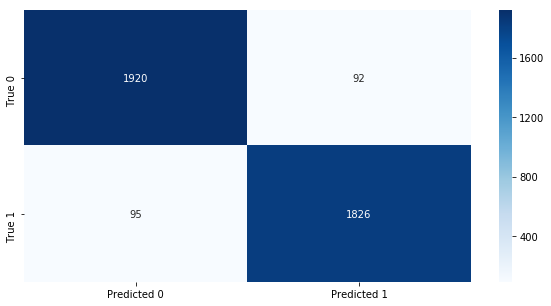

In [192]:
# Predicting our classes for our LR model as is
y_pred_NN = NN_model.predict(X_test)

# Setting up our confusion matrix 
NN_confusion_matrix = confusion_matrix(y_test,y_pred_NN)

# Putting the confusion matrix in a DataFrame
NN_confusion_matrix = pd.DataFrame(data = NN_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
NN_classification_report = classification_report(y_test,y_pred_NN)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(NN_confusion_matrix)
print('\n')
print('Classification Report')
print(NN_classification_report)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(NN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

### Naive Bayes Classifier

In [193]:
%%time
# Instantiating the Naive Bayes Multinomial model
NB_model = MultinomialNB()

# Fitting the Model
NB_model.fit(X_train, y_train)

# Scoring the model on training data
NB_model.score(X_train, y_train)

# Scoring the model on test data
NB_model.score(X_test, y_test)

print(f'The training score using a Naive Bayes Multinomial is: {NB_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Naive Bayes Multinomial is: {NB_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Naive Bayes Multinomial is: 0.9240244168301722


The testing score using a Naive Bayes Multinomial is: 0.924739384693618


Time taken to run the model:
CPU times: user 103 ms, sys: 5.13 ms, total: 108 ms
Wall time: 111 ms


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1837          175
True 1          121         1800


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2012
           1       0.91      0.94      0.92      1921

    accuracy                           0.92      3933
   macro avg       0.92      0.93      0.92      3933
weighted avg       0.93      0.92      0.92      3933



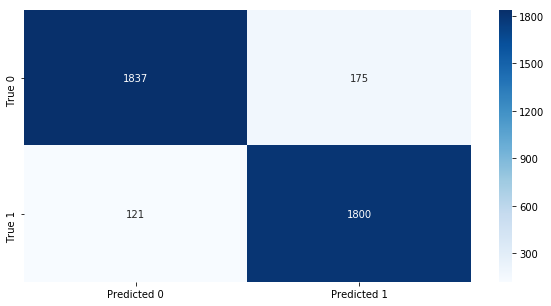

In [194]:
# Predicting our classes for our LR model as is
y_pred_NB = NB_model.predict(X_test)

# Setting up our confusion matrix 
NB_confusion_matrix = confusion_matrix(y_test,y_pred_NB)

# Putting the confusion matrix in a DataFrame
NB_confusion_matrix = pd.DataFrame(data = NB_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
NB_classification_report = classification_report(y_test,y_pred_NB)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(NB_confusion_matrix)
print('\n')
print('Classification Report')
print(NB_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(NB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()
print('\n')

### AdaBoost Classifier

In [195]:
%%time
# Instantiating the AdaBoostClassifier Multinomial model
ADB_model = AdaBoostClassifier()

# Fitting the Model
ADB_model.fit(X_train, y_train)

# Scoring the model on training data
ADB_model.score(X_train, y_train)

# Scoring the model on test data
ADB_model.score(X_test, y_test)

print(f'The training score using a AdaBoost Classifier is: {ADB_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a AdaBoost Classifier is: {ADB_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a AdaBoost Classifier is: 0.9361238282101592


The testing score using a AdaBoost Classifier is: 0.9338927027714213


Time taken to run the model:
CPU times: user 5.06 s, sys: 134 ms, total: 5.2 s
Wall time: 5.36 s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1867          145
True 1          115         1806


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2012
           1       0.93      0.94      0.93      1921

    accuracy                           0.93      3933
   macro avg       0.93      0.93      0.93      3933
weighted avg       0.93      0.93      0.93      3933



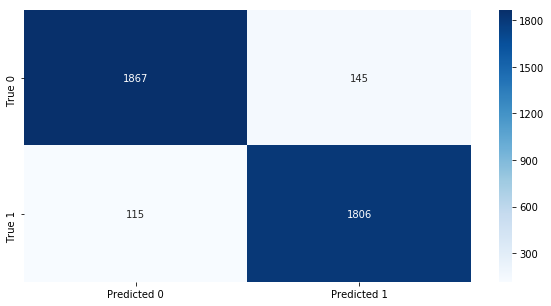

In [196]:
# Predicting our classes for our LR model as is
y_pred_ADB = ADB_model.predict(X_test)

# Setting up our confusion matrix 
ADB_confusion_matrix = confusion_matrix(y_test,y_pred_ADB)

# Putting the confusion matrix in a DataFrame
ADB_confusion_matrix = pd.DataFrame(data = ADB_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
ADB_classification_report = classification_report(y_test,y_pred_ADB)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(ADB_confusion_matrix)
print('\n')
print('Classification Report')
print(ADB_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(ADB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

### Support Vector Machines


In [197]:
###
# Instantiating the Naive Bayes Multinomial model
SVC_model = LinearSVC()

# Fitting the Model
SVC_model.fit(X_train, y_train)

# Scoring the model on training data
SVC_model.score(X_train, y_train)

# Scoring the model on test data
SVC_model.score(X_test, y_test)

print(f'The training score using a Support Vector Machines Classifier is: {SVC_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Support Vector Machines Classifier is: {SVC_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Support Vector Machines Classifier is: 0.9722040549378679


The testing score using a Support Vector Machines Classifier is: 0.9549961861174676


Time taken to run the model:


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1931           81
True 1           96         1825


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2012
           1       0.96      0.95      0.95      1921

    accuracy                           0.95      3933
   macro avg       0.96      0.95      0.95      3933
weighted avg       0.96      0.95      0.95      3933



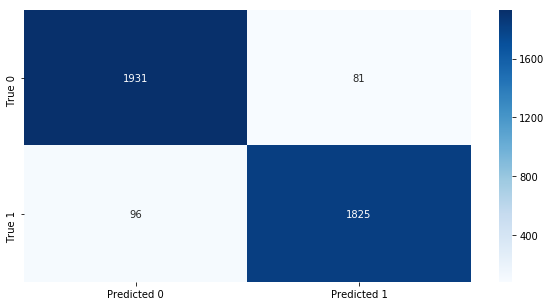

In [198]:
# Predicting our classes for our LR model as is
y_pred_SVC = SVC_model.predict(X_test)

# Setting up our confusion matrix 
SVC_confusion_matrix = confusion_matrix(y_test,y_pred_SVC)

# Putting the confusion matrix in a DataFrame
SVC_confusion_matrix = pd.DataFrame(data = SVC_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
SVC_classification_report = classification_report(y_test,y_pred_SVC)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(SVC_confusion_matrix)
print('\n')
print('Classification Report')
print(SVC_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(SVC_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

**Confusion Matrix Subplots for all Models**

Text(0.5, 1.0, 'Support Vector Classifier  - Confusion Matrix')

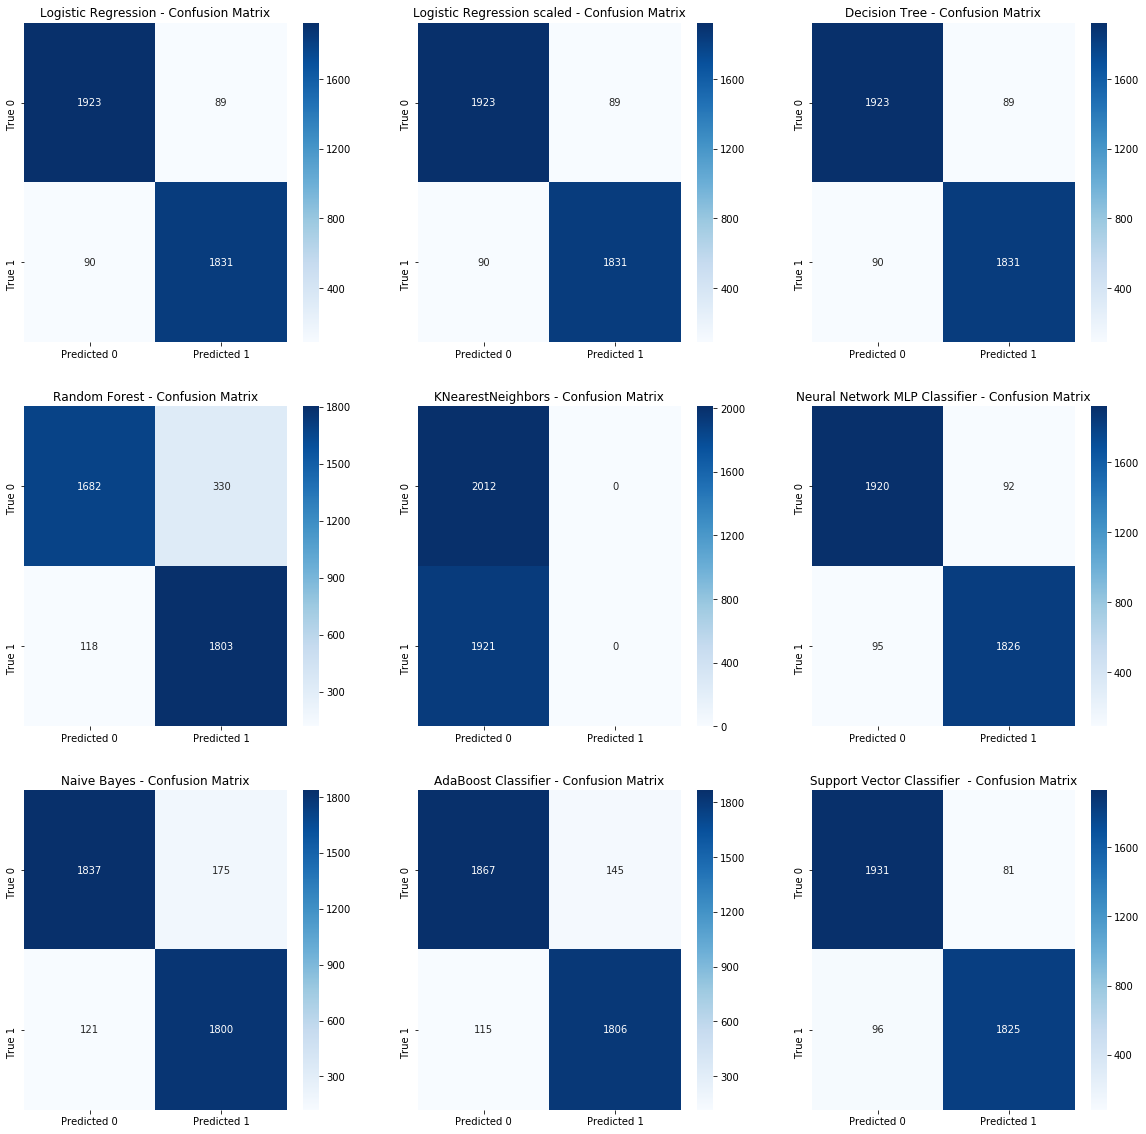

In [199]:
# Subplot 1 - Plotting confusion matrix heatmap subplot for Logistic Regresion
plt.subplots(3,3,figsize = (20,20))
plt.subplot(3,3,1) 
sns.heatmap(LR_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.title('Logistic Regression - Confusion Matrix')

# Subplot 2 - Plotting confusion matrix heatmap subplot for Scaled PCA - Logistic Regression 
plt.subplot(3,3,2) 
sns.heatmap(LRSS_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Logistic Regression scaled - Confusion Matrix')

# Subplot 3 - Plotting confusion matrix heatmap subplot for Decision Trees
plt.subplot(3,3,3) 
sns.heatmap(DT_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Decision Tree - Confusion Matrix') 

# Subplot 4 - Plotting confusion matrix heatmap subplot for Random Forest
plt.subplot(3,3,4) 
sns.heatmap(RF_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Random Forest - Confusion Matrix')

# Subplot 5 - Plotting confusion matrix heatmap subplot for K Nearest Neighbors
plt.subplot(3,3,5) 
sns.heatmap(KNN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('KNearestNeighbors - Confusion Matrix')

# Subplot 6 - Plotting confusion matrix heatmap subplot for Neural Network
plt.subplot(3,3,6) 
sns.heatmap(NN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Neural Network MLP Classifier - Confusion Matrix')

# Subplot 7 - Plotting confusion matrix heatmap subplot for Naive Bayes
plt.subplot(3,3,7) 
sns.heatmap(NB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Naive Bayes - Confusion Matrix')


# Subplot 8 - Plotting confusion matrix heatmap subplot for Ada Boost
plt.subplot(3,3,8)
sns.heatmap(ADB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('AdaBoost Classifier - Confusion Matrix')


# Subplot 9 - Plotting confusion matrix heatmap subplot for Support Vector Machines 
plt.subplot(3,3,9)
sns.heatmap(SVC_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Support Vector Classifier  - Confusion Matrix')


In terms of looking at the confusion matrices above, we must keep in mind that true articles are denoted by **1** while fake articles are denoted by **0**. We can see from the above that the best model regardless of accuracy is the **AdaBoost Classifier** which has the highest number of true positives and true negatives while only having to wrongly classify articles less than 0.02% of the time. 

One of the observation we made is that K Nearest Neighbors Classifier tends to do the worse out of all baseline models when looking at the confusion matrix even though it has an accuracy of slightly over 80. But when making the decision, it seems to not really identify the true negatives correctly but rather many false negatives which is equivalent to just tossing a coin and making the decision.

Below, we're going to save all these models that we instantiated so that we can give the user an option to choose from the models.

In [200]:
# Saving all the different models created
#Saving Logistic Regression models
joblib.dump(LR_model, 'LR_model.pkl')
joblib.dump(LR_model, 'LR_model.h5')

#Saving Logistic Regression Scaled model
joblib.dump(LRSS_model, 'LRSS_model.pkl')
joblib.dump(LRSS_model, 'LRSS_model.h5')

#Saving Decision Tree model
joblib.dump(DT_model, 'DT_model.pkl')
joblib.dump(DT_model, 'DT_model.h5')

#Saving Random Forest model
joblib.dump(RF_model, 'RF_model.pkl')
joblib.dump(RF_model, 'RF_model.h5')

#Saving the K Nearest Neighbors model even though the performance wasn't so great
joblib.dump(KNN_model, 'KNN_model.pkl')
joblib.dump(KNN_model, 'KNN_model.h5')

#Saving Neural Network model
joblib.dump(NN_model, 'NN_model.pkl')
joblib.dump(NN_model, 'NN_model.h5')

#Saving Naive Bayes model
joblib.dump(NB_model, 'NB_model.pkl')
joblib.dump(NB_model, 'NB_model.h5')

#SAving AdaBoost model
joblib.dump(ADB_model, 'ADB_model.pkl')
joblib.dump(ADB_model, 'ADB_model.h5')

# Saving Support Vector Machines models
joblib.dump(SVC_model, 'SVC_model.pkl')
joblib.dump(SVC_model, 'SVC_model.h5')


['SVC_model.h5']

**Let's now take a look at all the training and testing scores for the models we ran above:**

In [202]:
# Printing all our training scores
print('Training Scores')
print(f'Logistic Regression: {LR_model.score(X_train, y_train)}')
print(f'Logistic Regression with Scaler: {LRSS_model.score(X_train_scaled, y_train)}')
print(f'Decision Tree Classifier: {DT_model.score(X_train, y_train)}')
print(f'Random Forest Classifier: {RF_model.score(X_train, y_train)}')
print(f'KNearestNeighbors Classifier: {KNN_model.score(X_train_scaled, y_train)}')
print(f'Neural Network with MLP Classifier: {NN_model.score(X_train, y_train)}')
print(f'Ada Boost Classifier: {ADB_model.score(X_train, y_train)}')
print(f'Support Vector Machines Classifier: {SVC_model.score(X_train, y_train)}')

print('\n')
# Printing all our testing scores
print('Testing Scores')
print(f'Logistic Regression: {LR_model.score(X_test, y_test)}')
print(f'Logistic Regression with Scaler: {LRSS_model.score(X_test_scaled, y_test)}')
print(f'Decision Tree Classifier: {DT_model.score(X_test, y_test)}')
print(f'Random Forest Classifier: {RF_model.score(X_test, y_test)}')
print(f'KNearestNeighbors Classifier: {KNN_model.score(X_test_scaled, y_test)}')
print(f'Neural Network with MLP Classifier: {NN_model.score(X_test, y_test)}')
print(f'Ada Boost Classifier: {ADB_model.score(X_test, y_test)}')
print(f'Support Vector Machines Classifier: {SVC_model.score(X_test, y_test)}')

Training Scores
Logistic Regression: 0.9609766732068891
Logistic Regression with Scaler: 0.9784172661870504
Decision Tree Classifier: 0.8003052103771529
Random Forest Classifier: 0.8889252234575976
KNearestNeighbors Classifier: 0.8896882494004796
Neural Network with MLP Classifier: 0.999890996293874
Ada Boost Classifier: 0.9361238282101592
Support Vector Machines Classifier: 0.9722040549378679


Testing Scores
Logistic Regression: 0.9544876684464785
Logistic Regression with Scaler: 0.9460971268751589
Decision Tree Classifier: 0.7930333079074497
Random Forest Classifier: 0.886092041698449
KNearestNeighbors Classifier: 0.8029494024917366
Neural Network with MLP Classifier: 0.9524535977625223
Ada Boost Classifier: 0.9338927027714213
Support Vector Machines Classifier: 0.9549961861174676


**Let's put these outputs to a dataframe:**

In [205]:
# Putting our ttraining scores for all our models
model_training_scores = [LR_model.score(X_train, y_train),\
                         LRSS_model.score(X_train_scaled, y_train),\
                         DT_model.score(X_train, y_train),\
                         RF_model.score(X_train, y_train),\
                         KNN_model.score(X_train_scaled, y_train),\
                         NN_model.score(X_train, y_train),\
                         NB_model.score(X_train, y_train),\
                         ADB_model.score(X_train, y_train),\
                         SVC_model.score(X_train,y_train)]

# Converting it into a series
model_training_series = pd.Series(model_training_scores)

# Putting our testing scores for all our models
model_testing_scores = [LR_model.score(X_test, y_test),\
                        LRSS_model.score(X_test_scaled, y_test),\
                        DT_model.score(X_test, y_test),\
                        RF_model.score(X_test, y_test),\
                        KNN_model.score(X_test_scaled, y_test),\
                        NN_model.score(X_test, y_test),\
                        NB_model.score(X_test, y_test),\
                        ADB_model.score(X_test, y_test),\
                        SVC_model.score(X_test,y_test)]

# Converting it into a series
model_testing_series = pd.Series(model_testing_scores)

In [206]:
# Setting up our training scores dataframe
training_scores_all = pd.DataFrame(model_training_scores)
training_scores_all.reset_index(drop = True, inplace = True)

# Setting up our testing scores dataframe
testing_scores_all = pd.DataFrame(model_testing_scores)
testing_scores_all.reset_index(drop = True, inplace = True)

# Concatenating our two dataframes for training and testing scores 
training_testing_scores = pd.concat([training_scores_all, testing_scores_all], axis = 1) 
training_testing_scores.columns = ['Training', 'Testing'] # Giving the columns name

# Giving the model names for our training and testing scores as index
index = ['Logistic Regression','Logistic Regression with Scaler',
         'Decision Tree Classifier', 'Random Forest Classifier',
         'KNeighborsClassifier','Neural Network', 'Naive Bayes',
         'AdaBoost Classifier', 'Support Vector Machines']

# Inputting the index column created
training_testing_scores['index'] = index 

# Setting the index as the index inputted as models
training_testing_scores.set_index('index')


,Training,Testing
index,,
Logistic Regression,0.960977,0.954488
Logistic Regression with Scaler,0.978417,0.946097
Decision Tree Classifier,0.800305,0.793033
Random Forest Classifier,0.888925,0.886092
KNeighborsClassifier,0.889688,0.802949
Neural Network,0.999891,0.952454
Naive Bayes,0.924024,0.924739
AdaBoost Classifier,0.936124,0.933893
Support Vector Machines,0.972204,0.954996


**Interpretation of the scores:**

Right of the bat, we can see that some of our models perform very well and are able to classify real and fake articles to an accuracy of up to 98%. However, accuracy alone should not be considered the best metric alone. Below, we'll take a look at the accuracy, precision, recall and f1-scores to really identify which model performs better but prior to that, let's state some observations noted from the scores above:

- Logistic Regression, Naive Bayes, Neural Networks MLP Classifier, Ada Boost and SVMs are close to perfect.
- Surprisingly, Random Forest Classifier gave us a lower score compared to the Decision Tree Classifier.
- K Neighbors Classifier does an average job in terms of the accuracy, scoring much lesser than every other model. However, when we looked at the precision and recall, it seems to really only have a 50% chance f detecting whether an article is real or not.  

In [207]:
# Adding Accuracy scores
accuracy_scores = [accuracy_score(y_test,y_pred_LR),accuracy_score(y_test,y_pred_LRSS), accuracy_score(y_test,y_pred_DT) ,accuracy_score(y_test,y_pred_RF),\
                   accuracy_score(y_test,y_pred_KNN),accuracy_score(y_test,y_pred_NN), accuracy_score(y_test,y_pred_NB), accuracy_score(y_test,y_pred_ADB), accuracy_score(y_test, y_pred_SVC)]

# Adding precision scores to list
precision_scores_0 = [precision_score(y_test,y_pred_LR, pos_label = '0'), precision_score(y_test,y_pred_LRSS, pos_label = '0'),\
                      precision_score(y_test,y_pred_DT, pos_label = '0'), precision_score(y_test,y_pred_RF, pos_label = '0'),\
                      precision_score(y_test,y_pred_KNN, pos_label = '0'), precision_score(y_test,y_pred_NN, pos_label = '0'),\
                      precision_score(y_test,y_pred_NB, pos_label = '0'), precision_score(y_test,y_pred_ADB, pos_label = '0'), precision_score(y_test,y_pred_SVC, pos_label = '0')]

precision_scores_1 = [precision_score(y_test,y_pred_LR, pos_label = '1'), precision_score(y_test,y_pred_LRSS, pos_label = '1'),\
                      precision_score(y_test,y_pred_DT, pos_label = '1'),precision_score(y_test,y_pred_RF, pos_label = '1'),\
                      precision_score(y_test,y_pred_KNN, pos_label = '1'), precision_score(y_test,y_pred_NN, pos_label = '1'),\
                      precision_score(y_test,y_pred_NB, pos_label = '1'), precision_score(y_test,y_pred_ADB, pos_label = '1'), precision_score(y_test,y_pred_SVC, pos_label = '1')]

# Adding recall scores to list
recall_scores_0 = [recall_score(y_test,y_pred_LR, pos_label = '0'), recall_score(y_test,y_pred_LRSS, pos_label = '0'),\
                   recall_score(y_test,y_pred_DT, pos_label = '0'), recall_score(y_test,y_pred_RF, pos_label = '0'),\
                   recall_score(y_test,y_pred_KNN, pos_label = '0'), recall_score(y_test,y_pred_NN, pos_label = '0'),\
                   recall_score(y_test,y_pred_NB, pos_label = '0'), recall_score(y_test,y_pred_ADB, pos_label = '0'), recall_score(y_test,y_pred_SVC, pos_label = '0')]

recall_scores_1 = [recall_score(y_test,y_pred_LR, pos_label = '1'), recall_score(y_test,y_pred_LRSS, pos_label = '1'),\
                   recall_score(y_test,y_pred_DT, pos_label = '1'), recall_score(y_test,y_pred_RF, pos_label = '1'),\
                   recall_score(y_test,y_pred_KNN, pos_label = '1'),recall_score(y_test,y_pred_NN, pos_label = '1'),\
                   recall_score(y_test,y_pred_NB, pos_label = '1'), recall_score(y_test,y_pred_ADB, pos_label = '1'), recall_score(y_test,y_pred_SVC, pos_label = '1')]

f1_scores_0 = [f1_score(y_test,y_pred_LR, pos_label = '0'), f1_score(y_test,y_pred_LRSS, pos_label = '0'),\
                   f1_score(y_test,y_pred_DT, pos_label = '0'), f1_score(y_test,y_pred_RF, pos_label = '0'),\
                   f1_score(y_test,y_pred_KNN, pos_label = '0'), f1_score(y_test,y_pred_NN, pos_label = '0'),\
                   f1_score(y_test,y_pred_NB, pos_label = '0'), f1_score(y_test,y_pred_ADB, pos_label = '0'), f1_score(y_test,y_pred_SVC, pos_label = '0')]

f1_scores_1 = [recall_score(y_test,y_pred_LR, pos_label = '1'), f1_score(y_test,y_pred_LRSS, pos_label = '1'),\
                   f1_score(y_test,y_pred_DT, pos_label = '1'), f1_score(y_test,y_pred_RF, pos_label = '1'),\
                   f1_score(y_test,y_pred_KNN, pos_label = '1'),f1_score(y_test,y_pred_NN, pos_label = '1'),\
                   f1_score(y_test,y_pred_NB, pos_label = '1'), f1_score(y_test,y_pred_ADB, pos_label = '1'), f1_score(y_test,y_pred_SVC, pos_label = '1')]

/Users/AlyB/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/AlyB/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Before we get into building a pipeline and running a GridSearchCV, let's look at the scores again for all baseline models:

In [208]:
scoring = pd.DataFrame([accuracy_scores,
                  precision_scores_0,
                  recall_scores_0,
                  precision_scores_1,
                  recall_scores_1,
                  f1_scores_0,
                  f1_scores_1],\
             columns = ['Logistic Regression',\
                        'Logistic Regression with PCA',\
                        'Decision Tree Classifier',\
                        'Random Forest Classifier',\
                        'K Nearest Neighbors',\
                        'Neural Network',\
                        'Naive Bayes',\
                        'AdaBoost Classifier',\
                       'Support Vector Machines'], index = ['Accuracy',
                                                            'Precision - Fake',
                                                            'Recall - Fake',
                                                            'Precision - True',
                                                            'Recall - True',
                                                            'F1 Score - Fake',
                                                            'F1 Score - True']).T
scoring

,Accuracy,Precision - Fake,Recall - Fake,Precision - True,Recall - True,F1 Score - Fake,F1 Score - True
Logistic Regression,0.954488,0.955291,0.955765,0.953646,0.953149,0.955528,0.953149
Logistic Regression with PCA,0.948131,0.962168,0.935388,0.934244,0.961478,0.948589,0.947665
Decision Tree Classifier,0.793033,0.910274,0.660537,0.723817,0.931806,0.765553,0.814747
Random Forest Classifier,0.886092,0.934444,0.835984,0.845288,0.938574,0.882476,0.889492
K Nearest Neighbors,0.511569,0.511569,1.000000,0.000000,0.000000,0.676871,0.000000
Neural Network,0.952454,0.952854,0.954274,0.952033,0.950547,0.953563,0.951289
Naive Bayes,0.924739,0.938202,0.913022,0.911392,0.937012,0.925441,0.924025
AdaBoost Classifier,0.933893,0.941978,0.927932,0.925679,0.940135,0.934902,0.932851
Support Vector Machines,0.954996,0.952639,0.959742,0.957503,0.950026,0.956177,0.953750


# End of Part 1 


### Please see Notebook 2 for Pipelining and GridSearchCV